<a href="https://colab.research.google.com/github/osohyun0224/Introduction-to-BigData/blob/master/Week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(tidyverse)

In [40]:
library(data.table)

In [41]:
system("gdown --id 1lPZ_dyxdZZECfzqmOimWHukmLaRwLggB")
system("ls", TRUE) #파일확인

[1] "Pre_Season_Batter_utf.csv" "sample_data"

In [42]:
#6번문제
DF <- fread("Pre_Season_Batter_utf.csv") %>% as_tibble()
head(DF, 1) # 첫 번째 행만 확인


batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,가르시아,2018,LG,0.35,7,20,1,7,1,⋯,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959


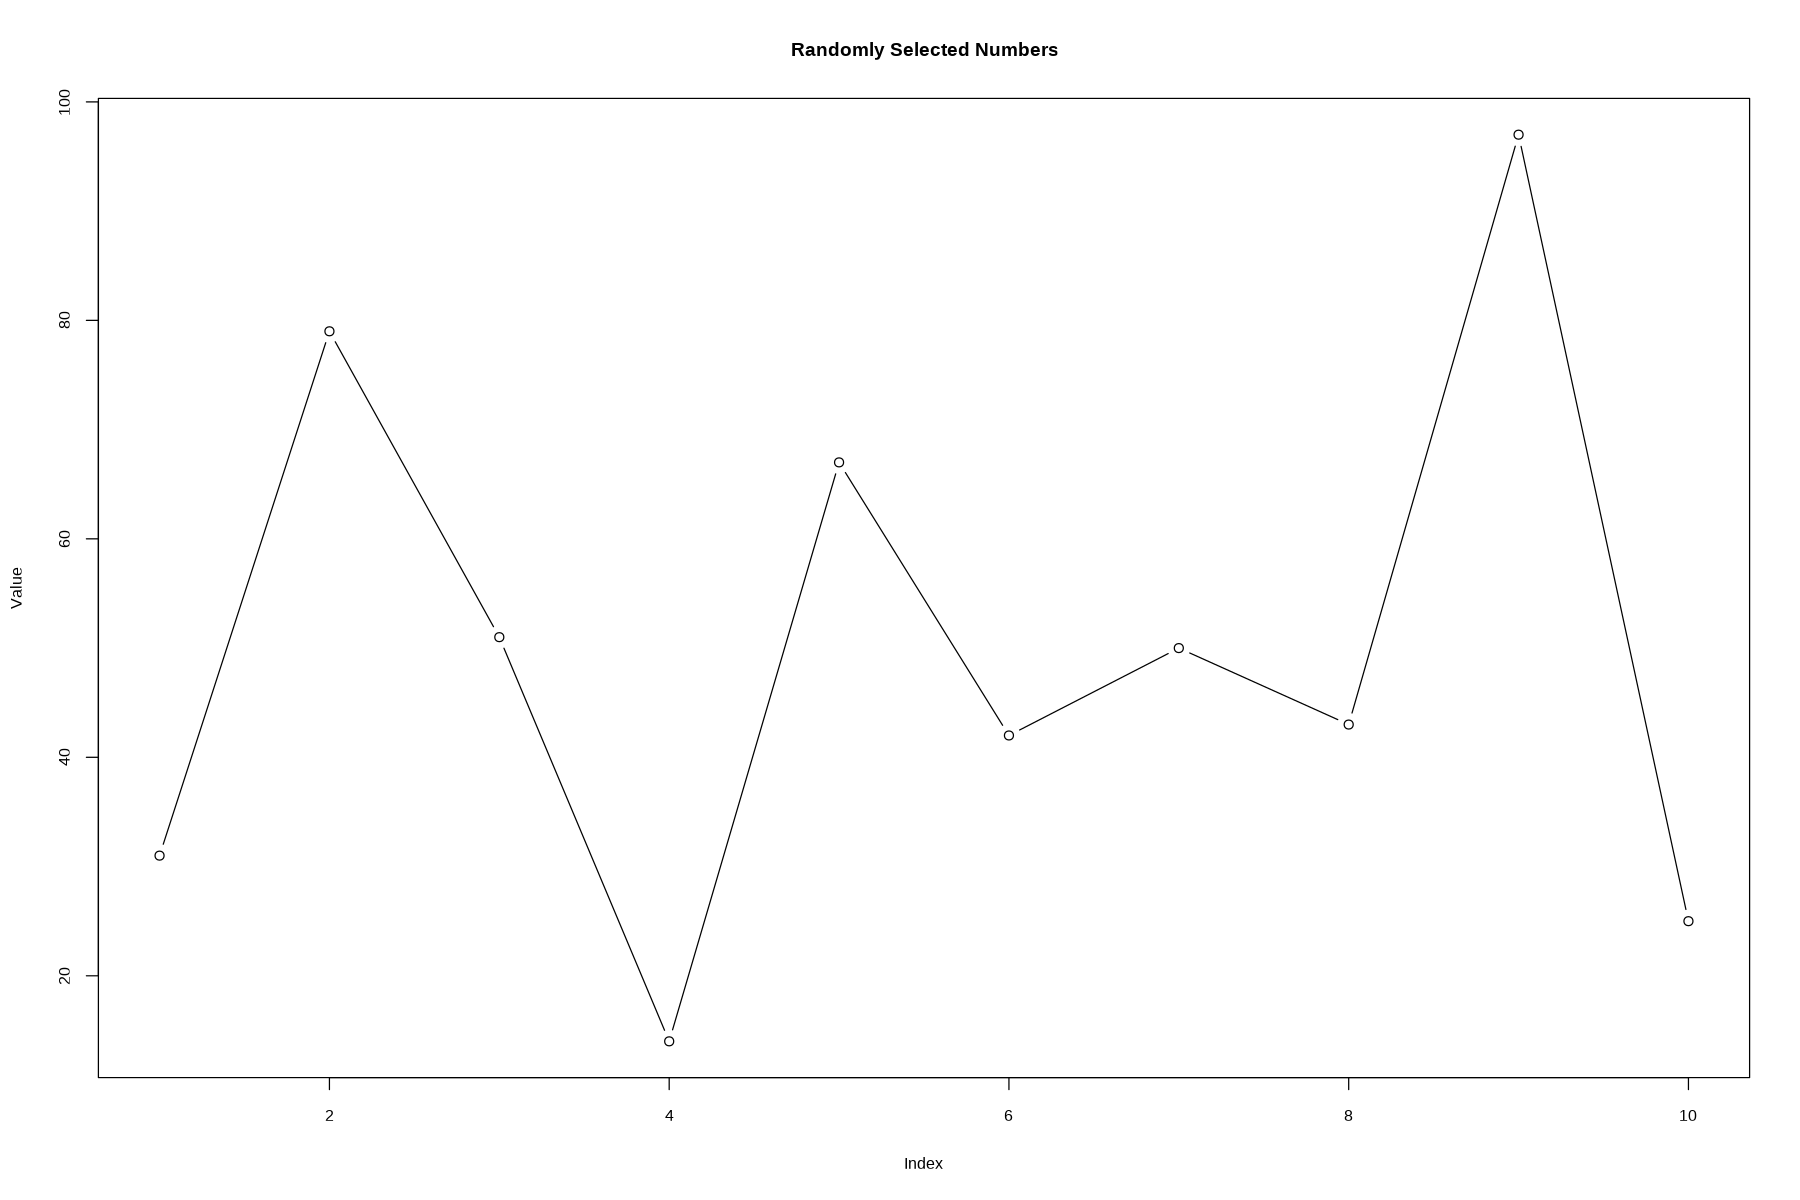

In [43]:
#7번 문제
set.seed(123) # 재현 가능한 결과를 얻기 위해 시드를 설정
random_numbers <- sample(1:100, 10)

plot(random_numbers, main="Randomly Selected Numbers", xlab="Index", ylab="Value", type="b")


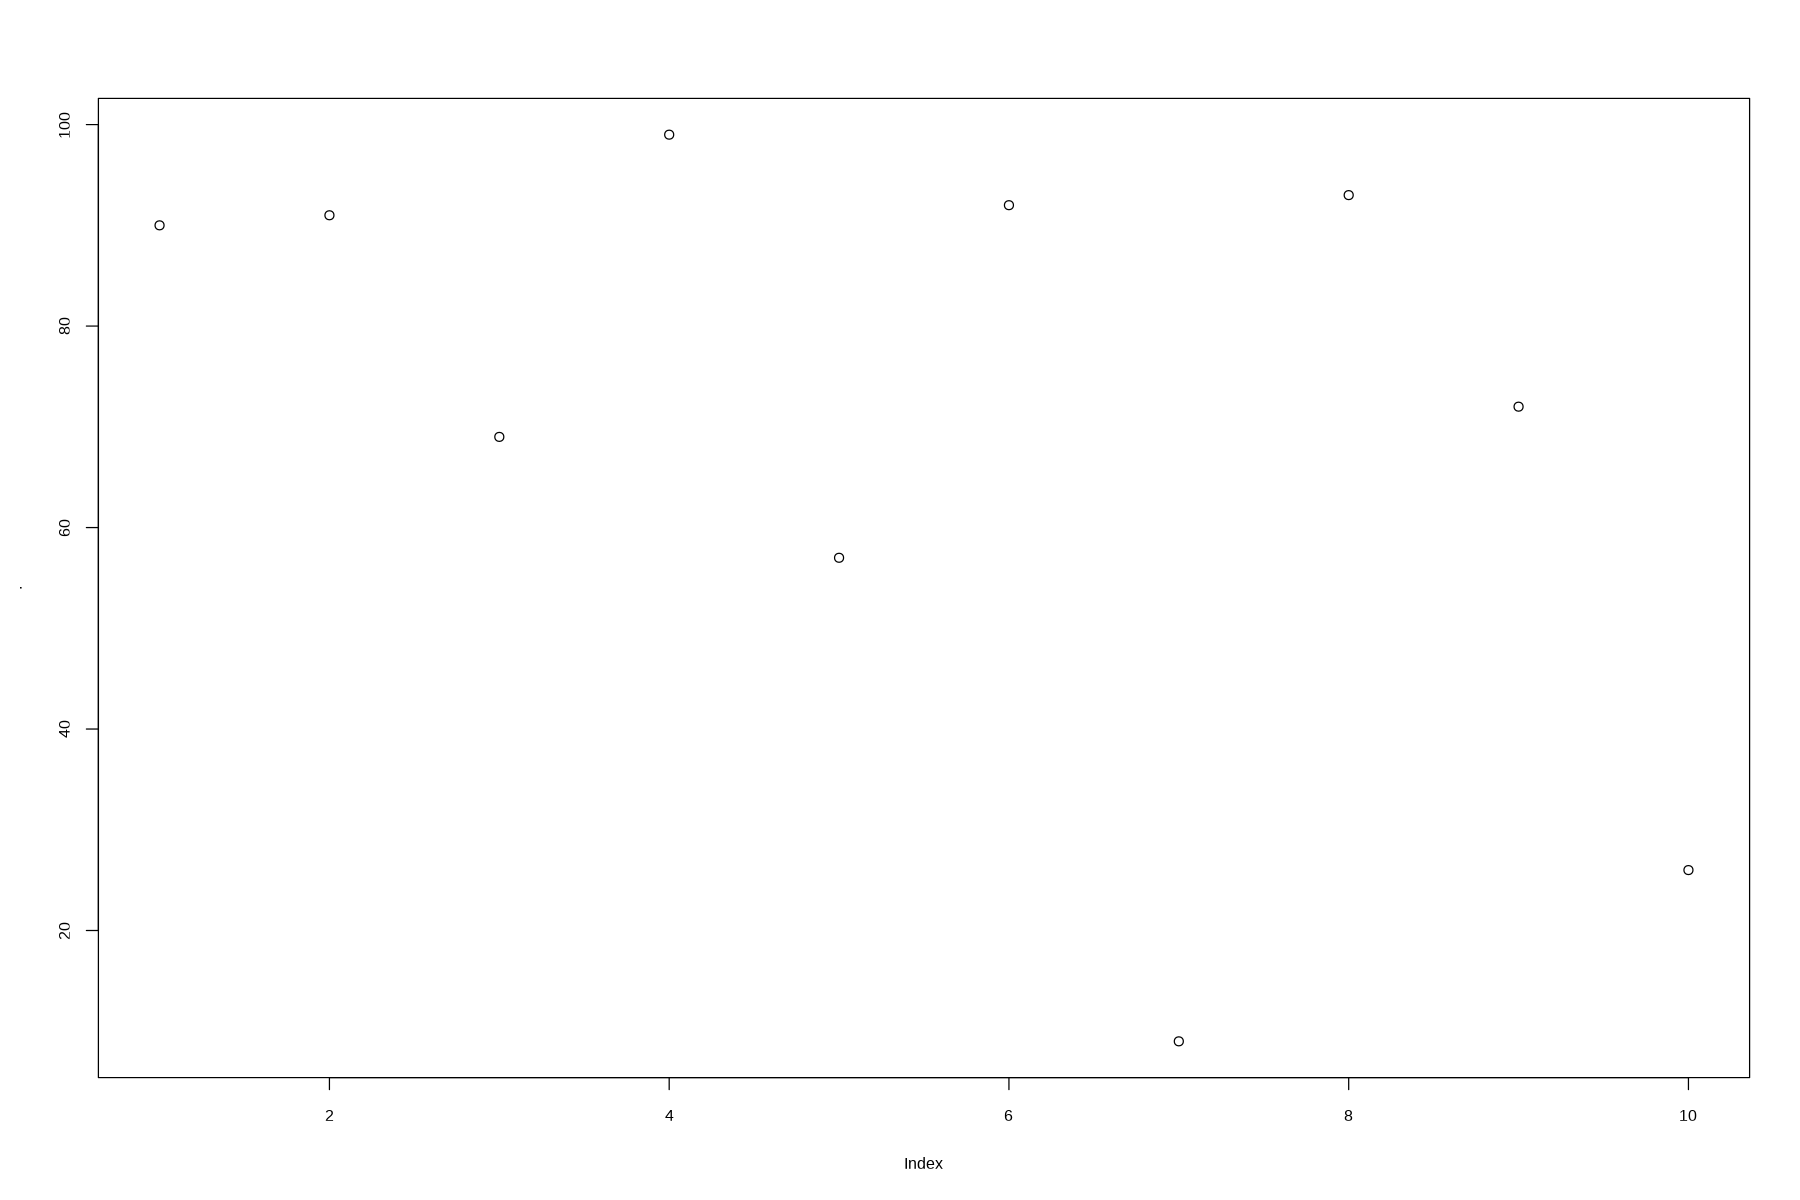

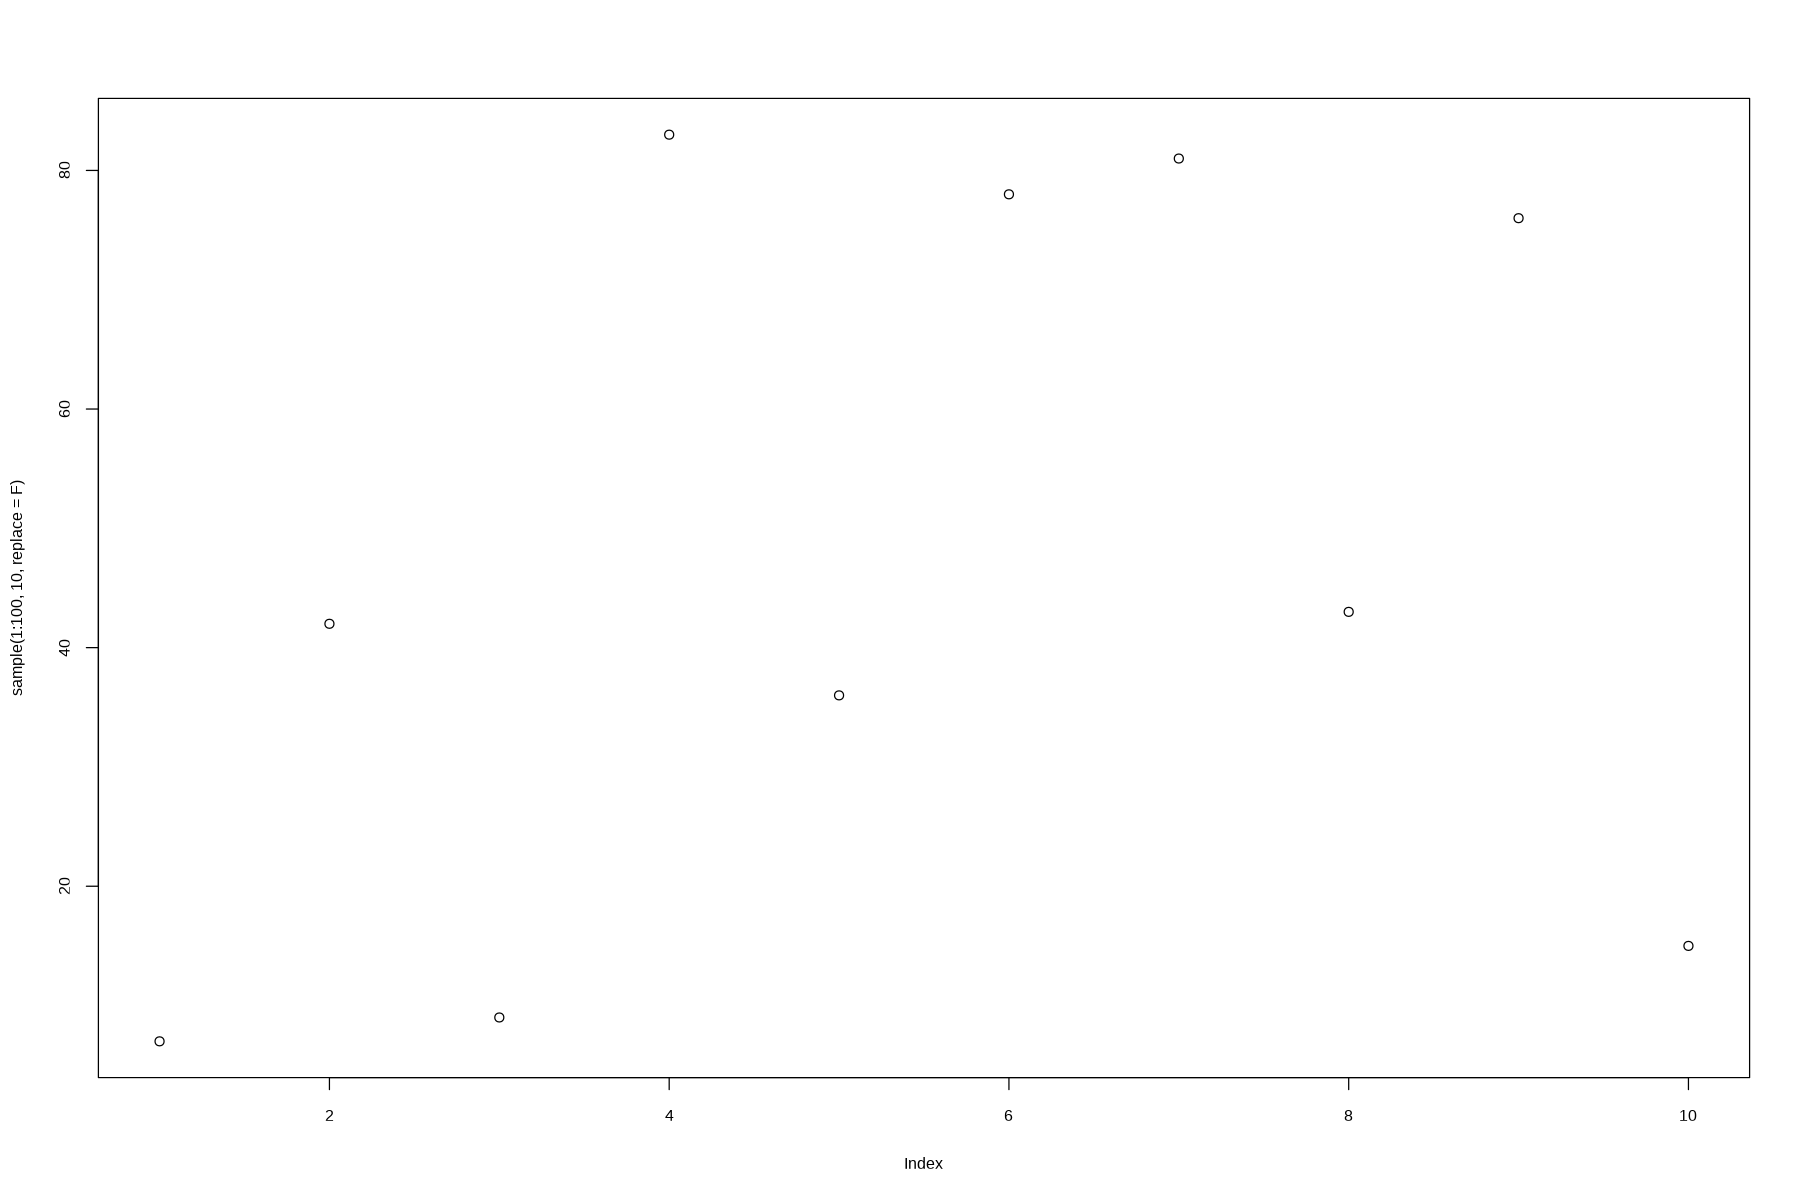

In [44]:
#7번 다른 풀이 위에꺼는 정답 아님
sample(1:100,10, replace=F) %>% plot()
plot(sample(1:100,10, replace=F))

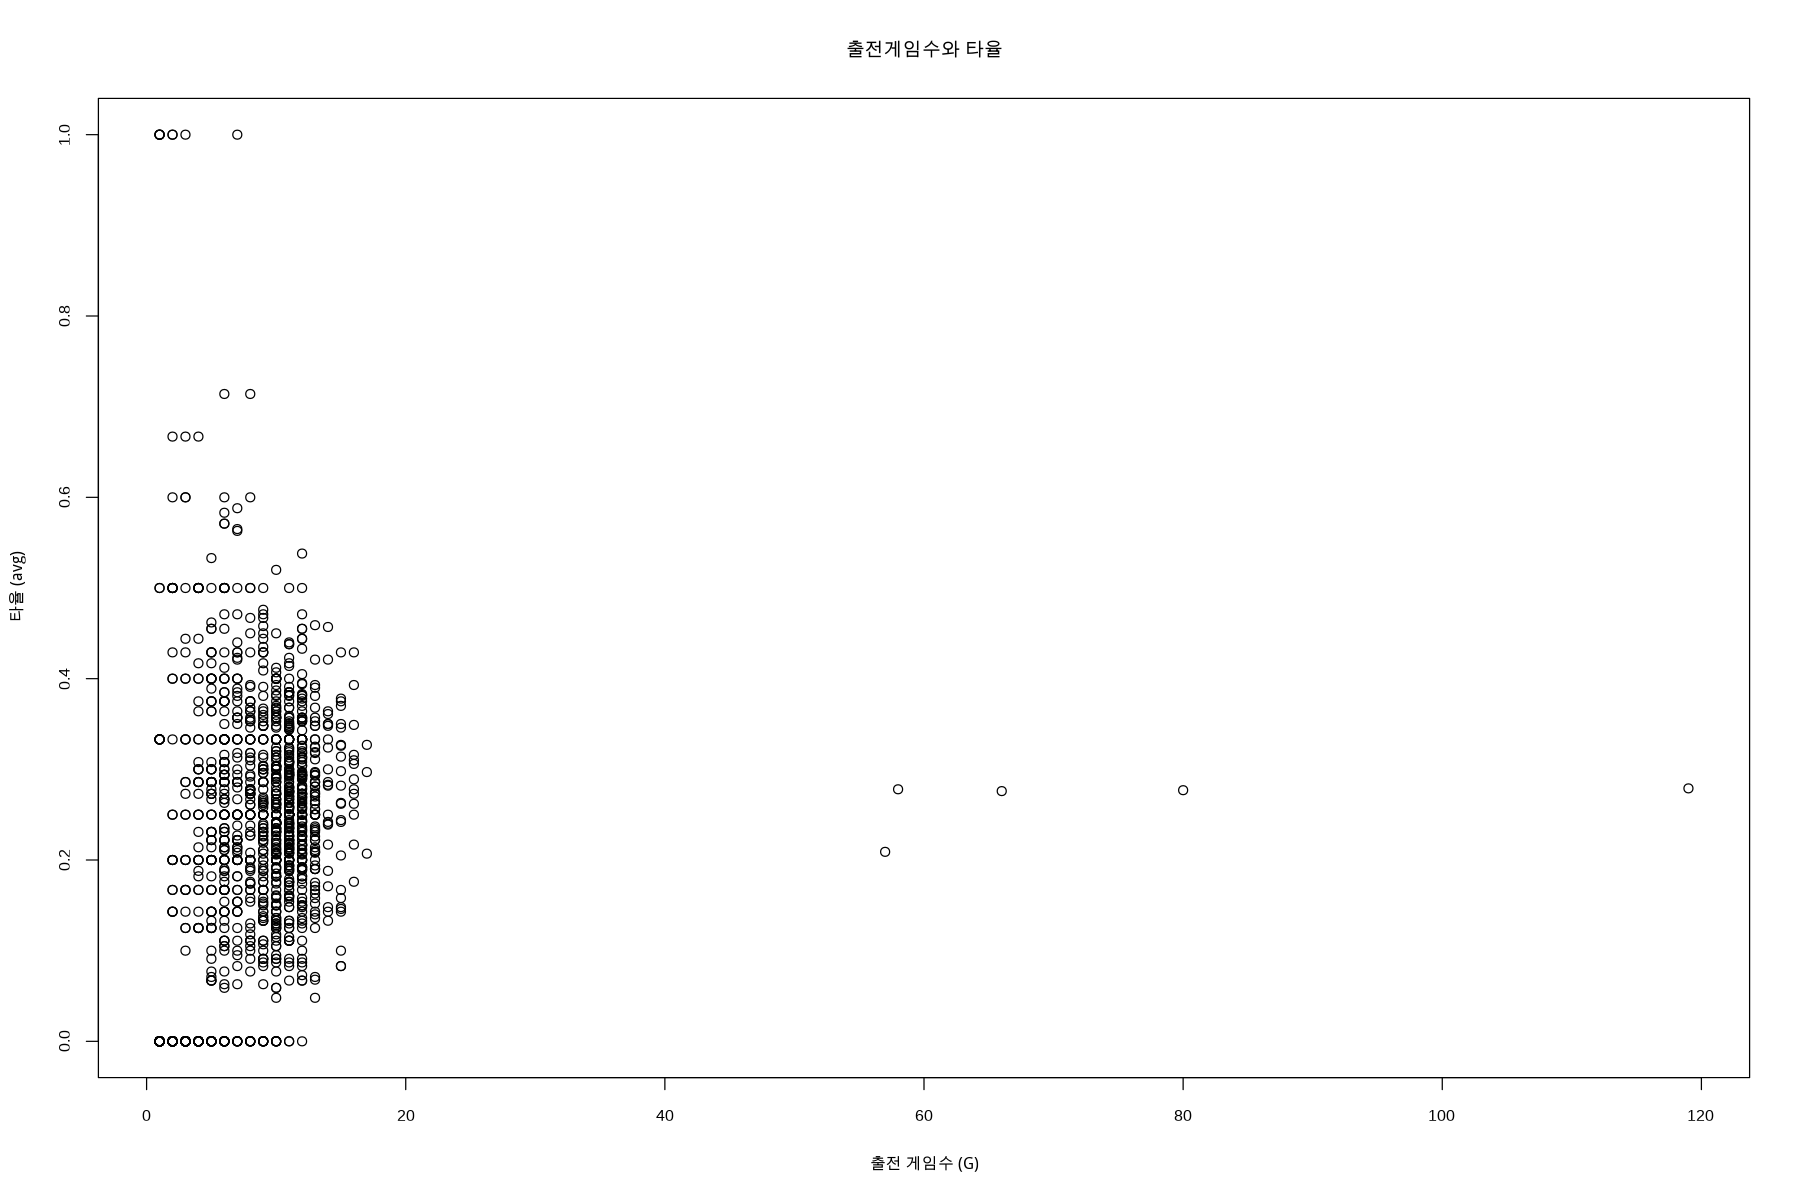

In [46]:
#8번
plot(DF$G, DF$avg, xlab="출전 게임수 (G)", ylab=" 타율 (avg)", main="출전게임수와 타율")
#이거 한글깨짐은 18번을 참고하셈
#출전 게임수는 증가하더라도 타율에는 변함이 없다.

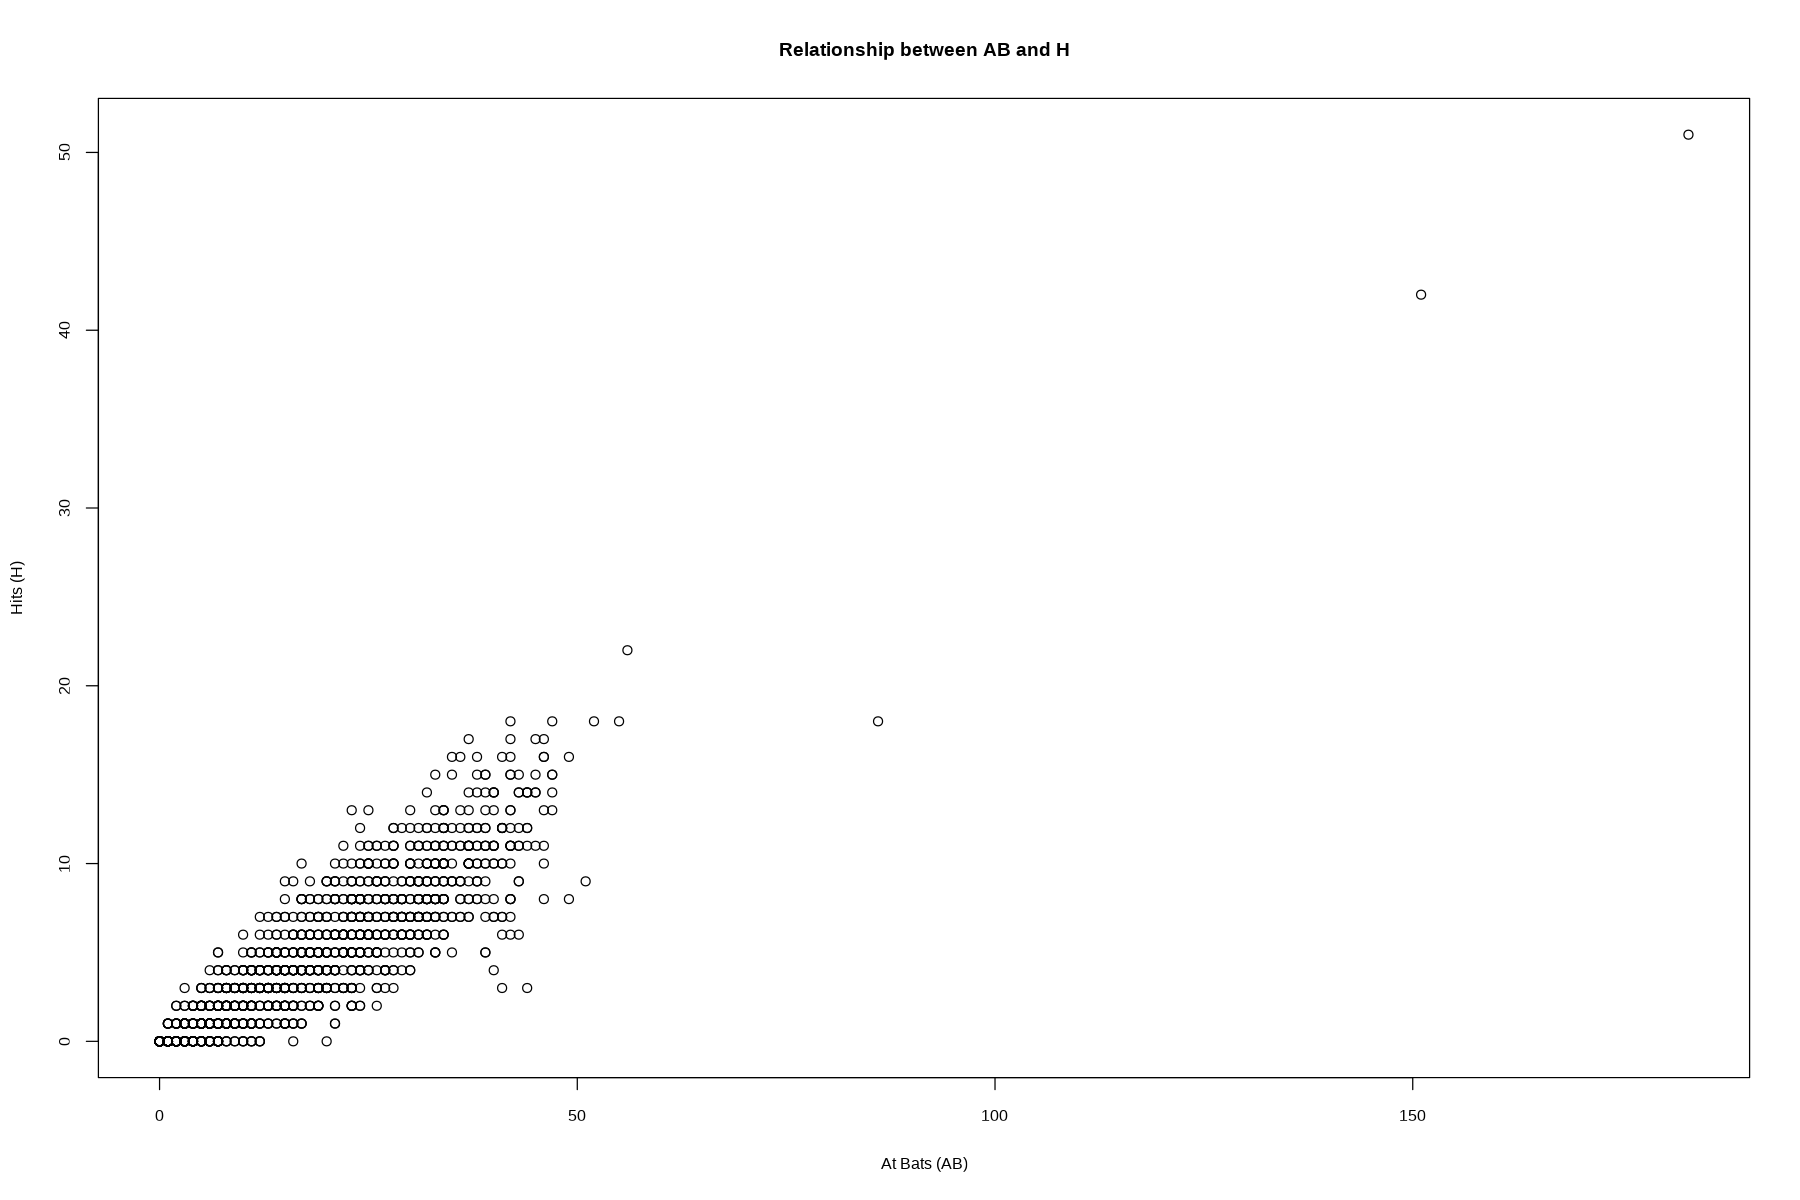

In [49]:
#9번
plot(DF$AB, DF$H, xlab="At Bats (AB)", ylab="Hits (H)", main="Relationship between AB and H")
#타수가 많을수록 안타의 확률은 증가한다.

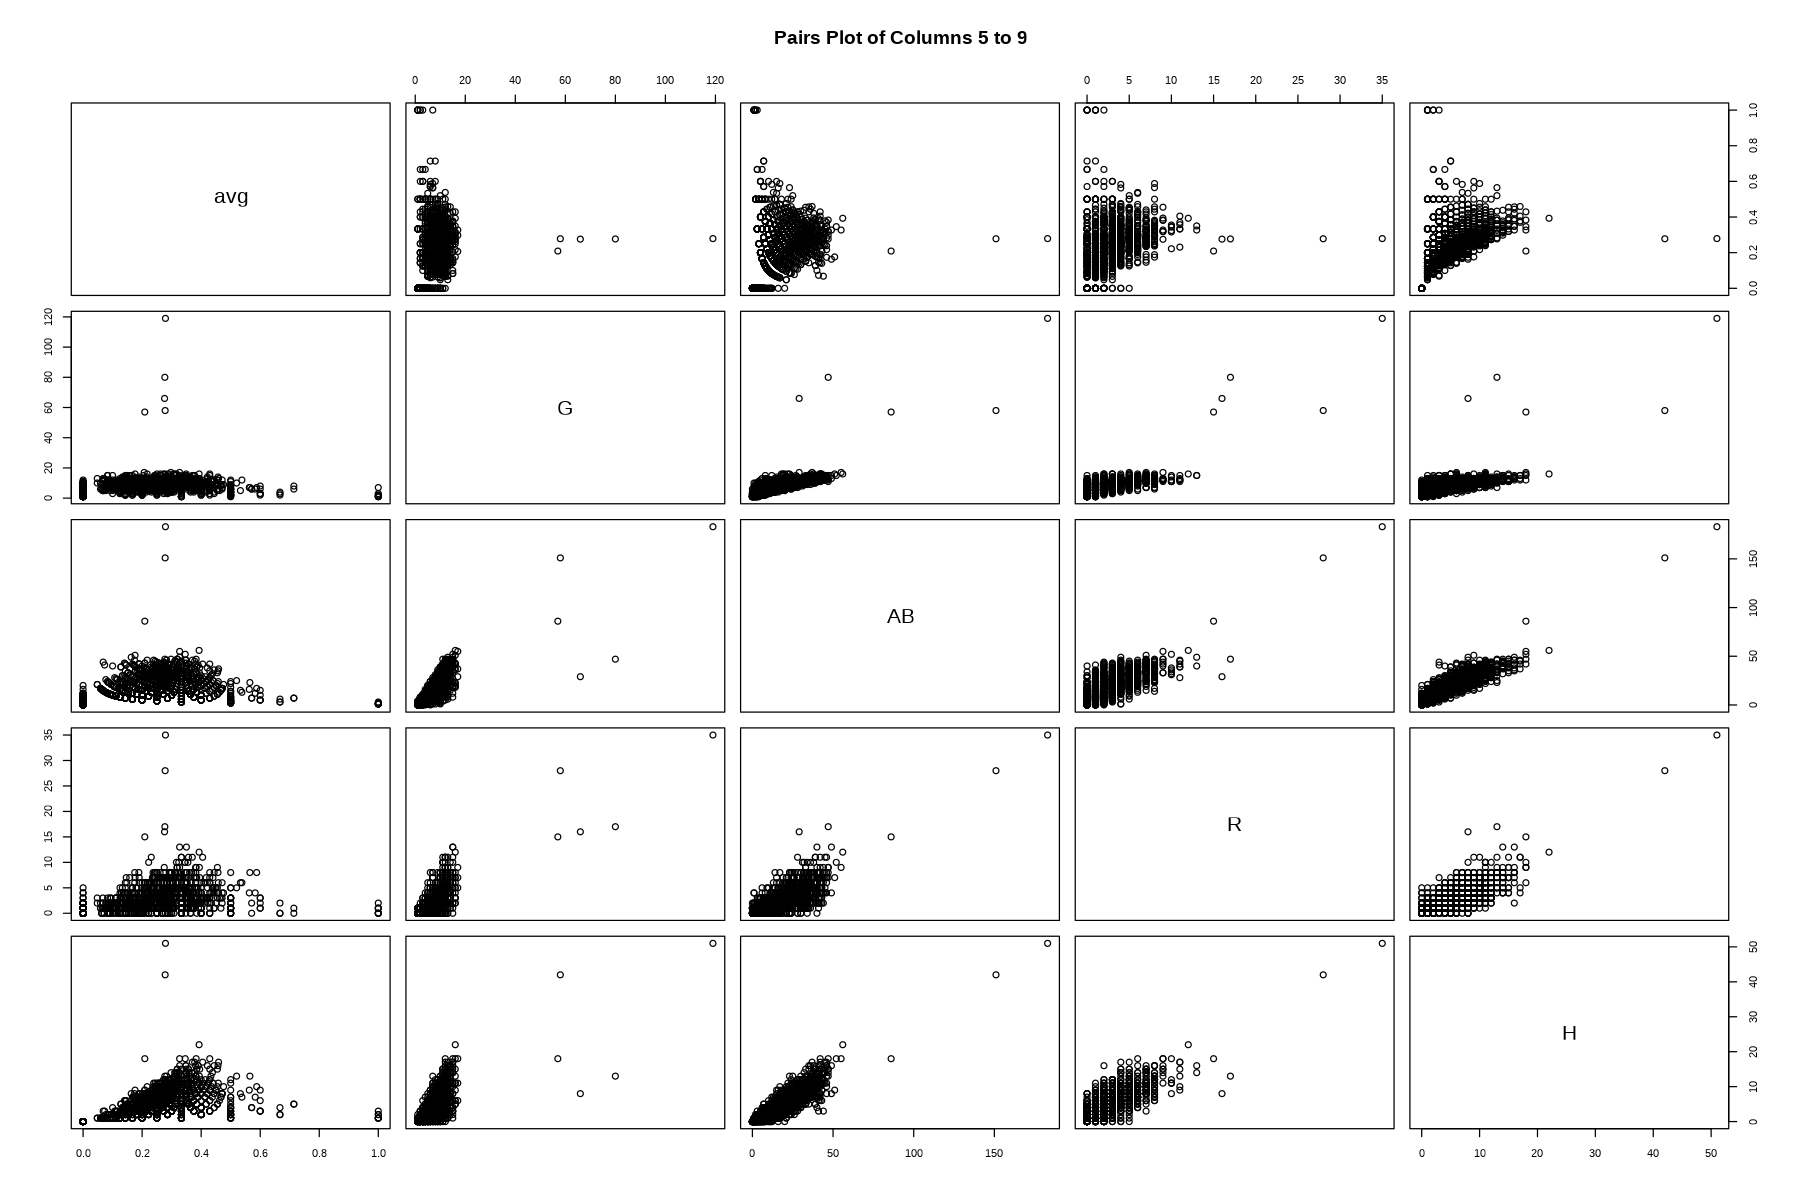

In [50]:
#10번
pairs(DF[,5:9], main="Pairs Plot of Columns 5 to 9")

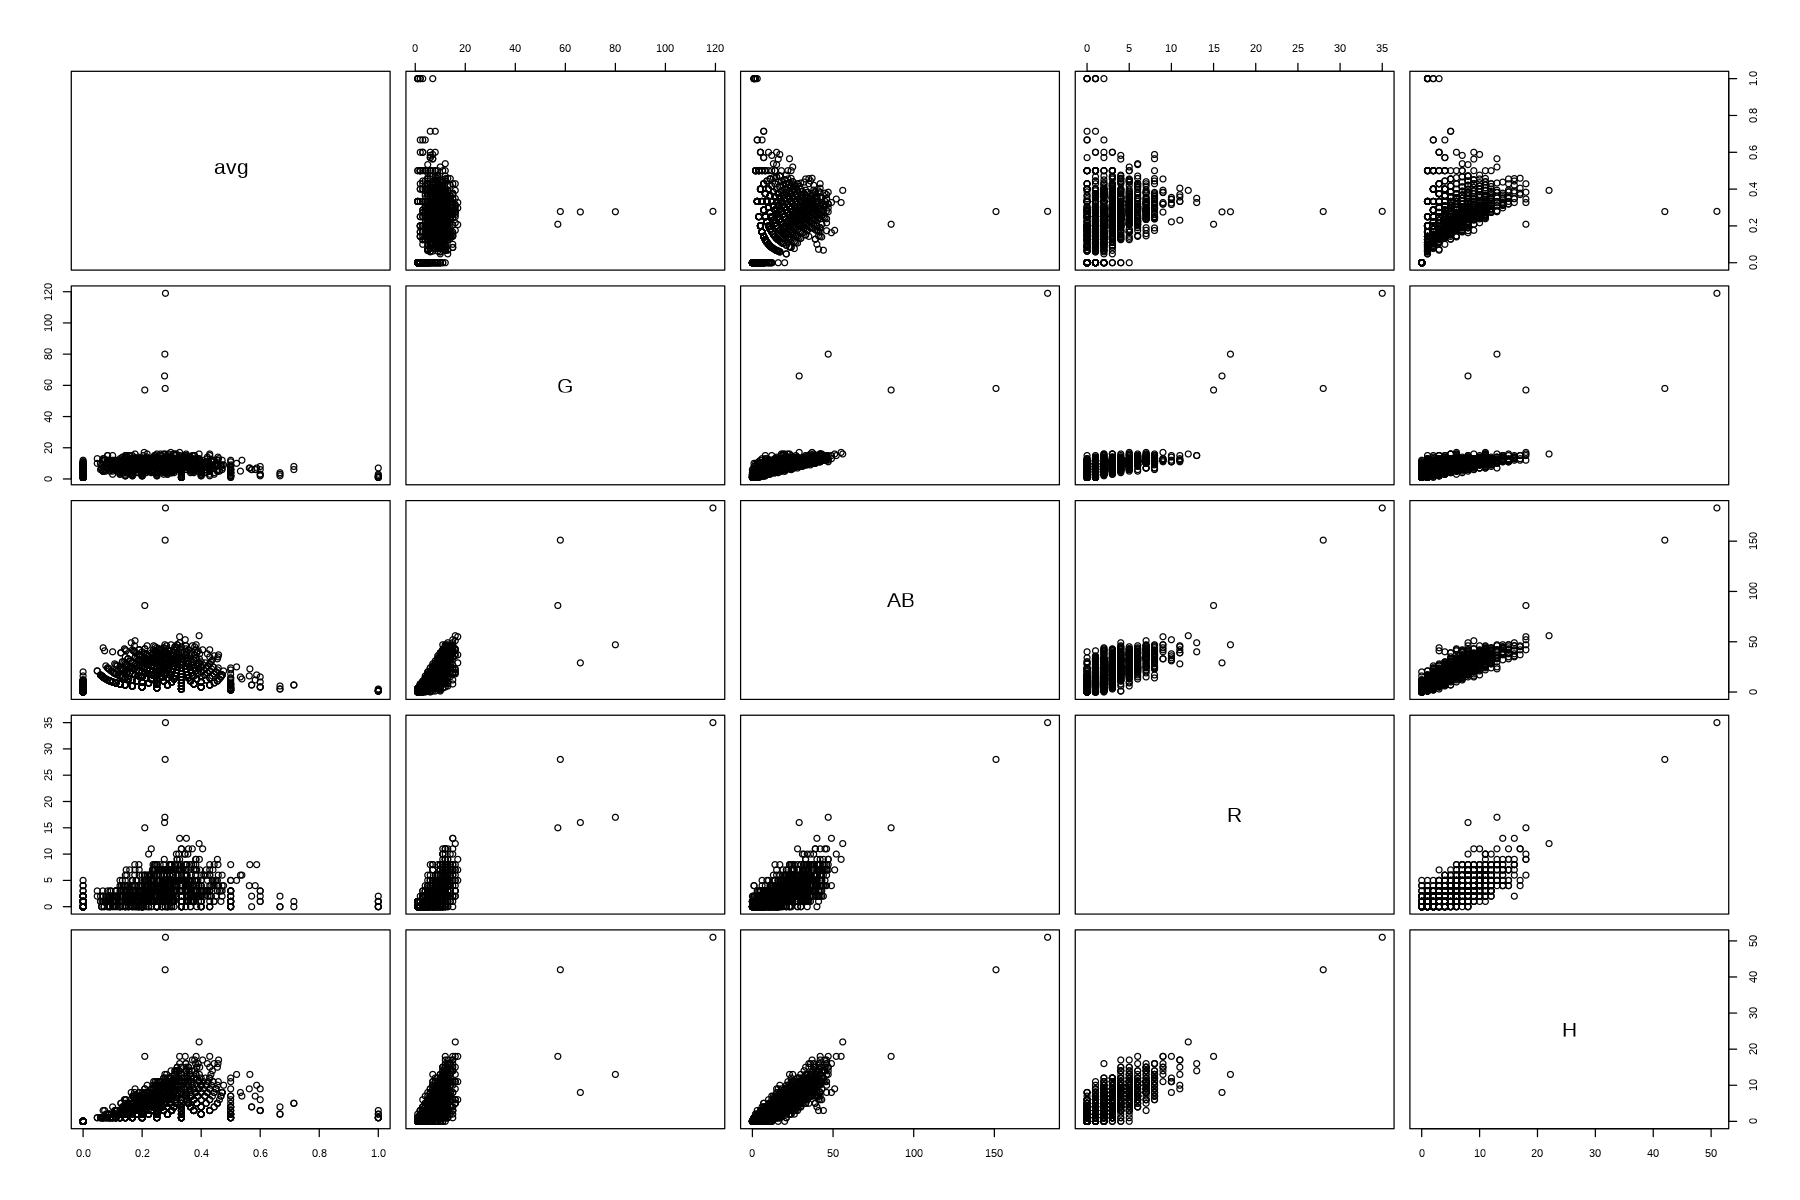

In [51]:
#10번 다른 풀이
DF[,5:9] %>% plot()

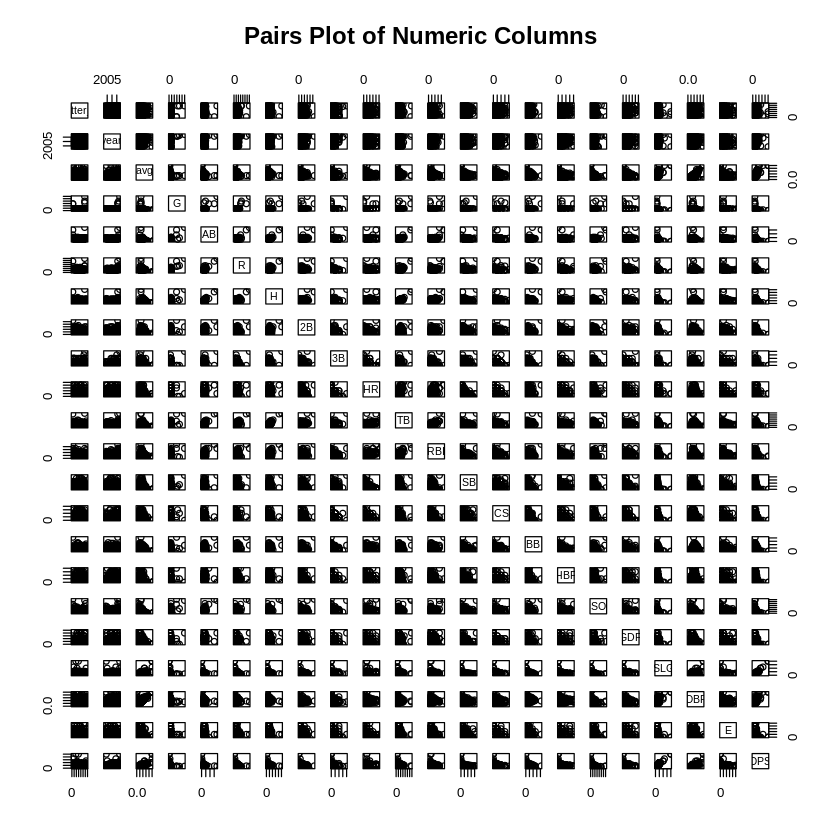

In [13]:
numeric_cols <- DF %>% select_if(is.numeric)
pairs(numeric_cols, main="Pairs Plot of Numeric Columns")


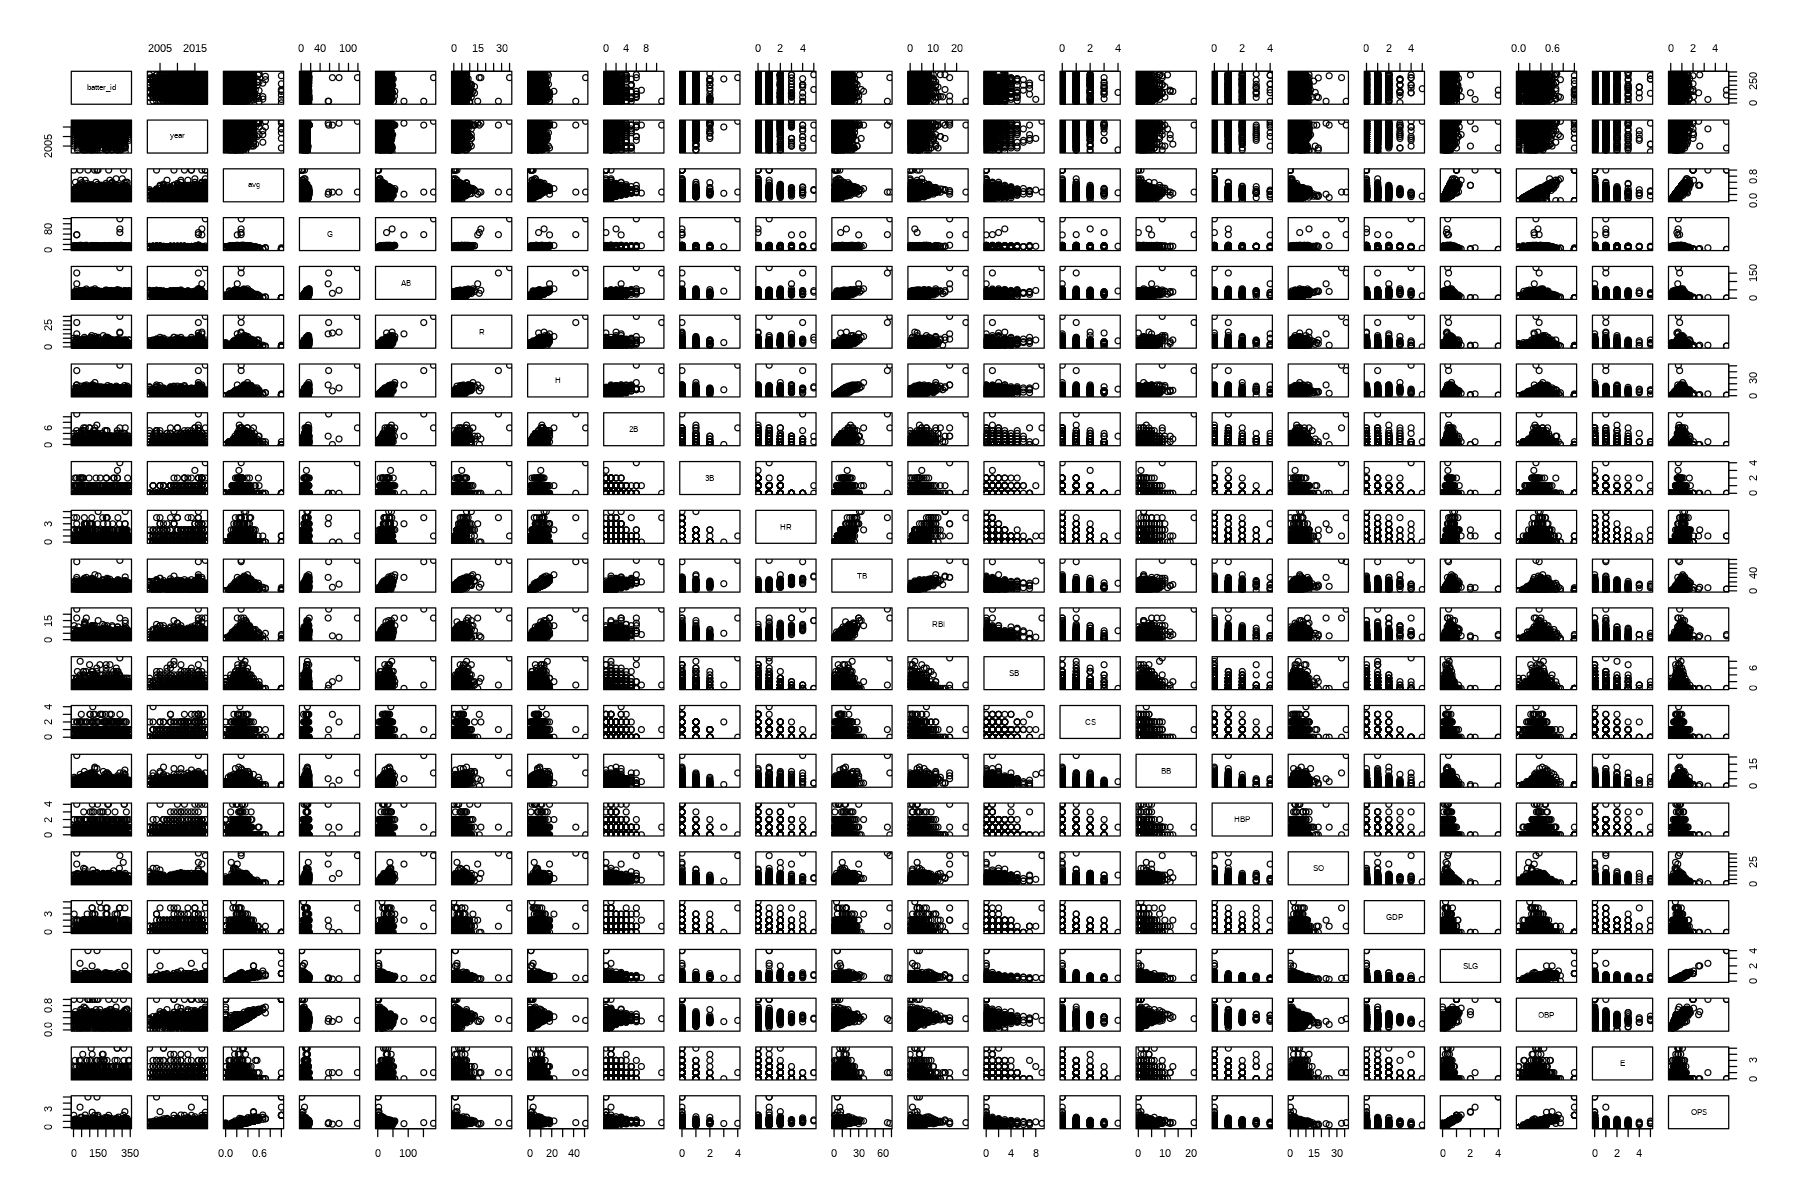

In [52]:
#11번 다른 풀이
DF %>% select_if(is.numeric)%>% plot()

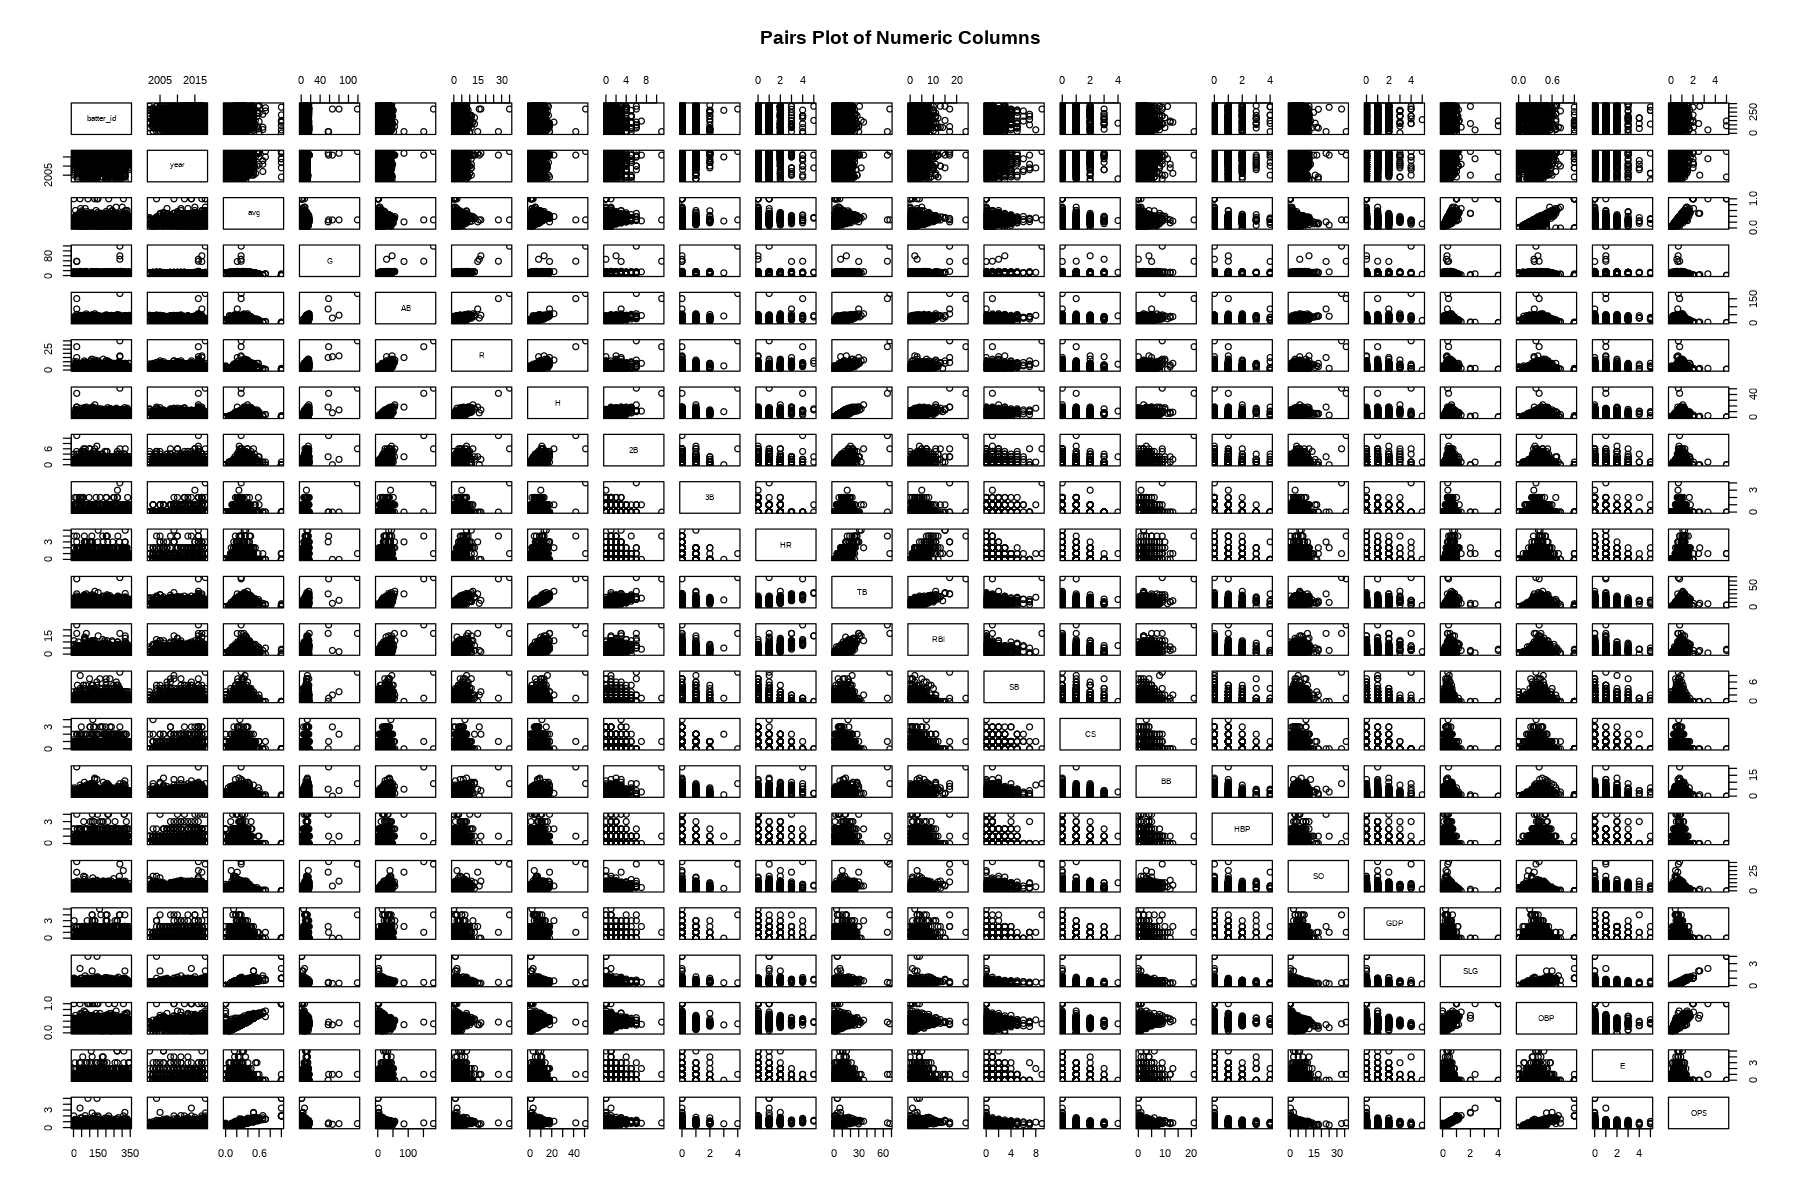

In [55]:
#12번
options(repr.plot.width=15, repr.plot.height=10)

# 이후 위의 문제(11번)의 코드를 다시 실행합니다.
numeric_cols <- DF %>% select_if(is.numeric)
pairs(numeric_cols, main="Pairs Plot of Numeric Columns")


In [54]:
#12번 다른 풀이
install.packages("repr")
library(repr)
options(rept.plot.width=15, repr.plot.height=10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
#13번 - 시험문제에 나옴
  team_year_avg <- DF %>%
  filter(team %in% c("KIA", "SK", "LG")) %>%
  group_by(team, year) %>%
  summarise(avg_mean = mean(avg, na.rm = TRUE))

team_year_avg %>% show()


`summarise()` has grouped output by 'team'. You can override using the
`.groups` argument.


# A tibble: 51 × 3
# Groups:   team [3]
   team   year avg_mean
   <chr> <int>    <dbl>
 1 KIA    2002    0.267
 2 KIA    2003    0.3  
 3 KIA    2004    0.5  
 4 KIA    2005    0.222
 5 KIA    2006    0.229
 6 KIA    2007    0.170
 7 KIA    2008    0.256
 8 KIA    2009    0.392
 9 KIA    2010    0.222
10 KIA    2011    0.188
# ℹ 41 more rows


In [58]:
#14번 문제
kia <- team_year_avg %>% filter(team == "KIA")
sk <- team_year_avg %>% filter(team == "SK")
lg <- team_year_avg %>% filter(team == "LG")

kia
sk
lg

team,year,avg_mean
<chr>,<int>,<dbl>
KIA,2002,0.2670000
KIA,2003,0.3000000
KIA,2004,0.5000000
KIA,2005,0.2223333
KIA,2006,0.2290000
KIA,2007,0.1696667
KIA,2008,0.2560000
KIA,2009,0.3918333
KIA,2010,0.2225000


team,year,avg_mean
<chr>,<int>,<dbl>
SK,2002,0.2275000
SK,2003,0.1070000
SK,2004,0.1968333
SK,2005,0.1770000
SK,2006,0.3268750
SK,2007,0.2423636
SK,2008,0.2397273
SK,2009,0.1782857
SK,2010,0.2234167


team,year,avg_mean
<chr>,<int>,<dbl>
LG,2002,0.0000000
LG,2003,0.1225000
LG,2004,0.3290000
LG,2005,0.2275000
LG,2006,0.3121667
LG,2007,0.2252500
LG,2008,0.2796667
LG,2009,0.1727000
LG,2010,0.2044545


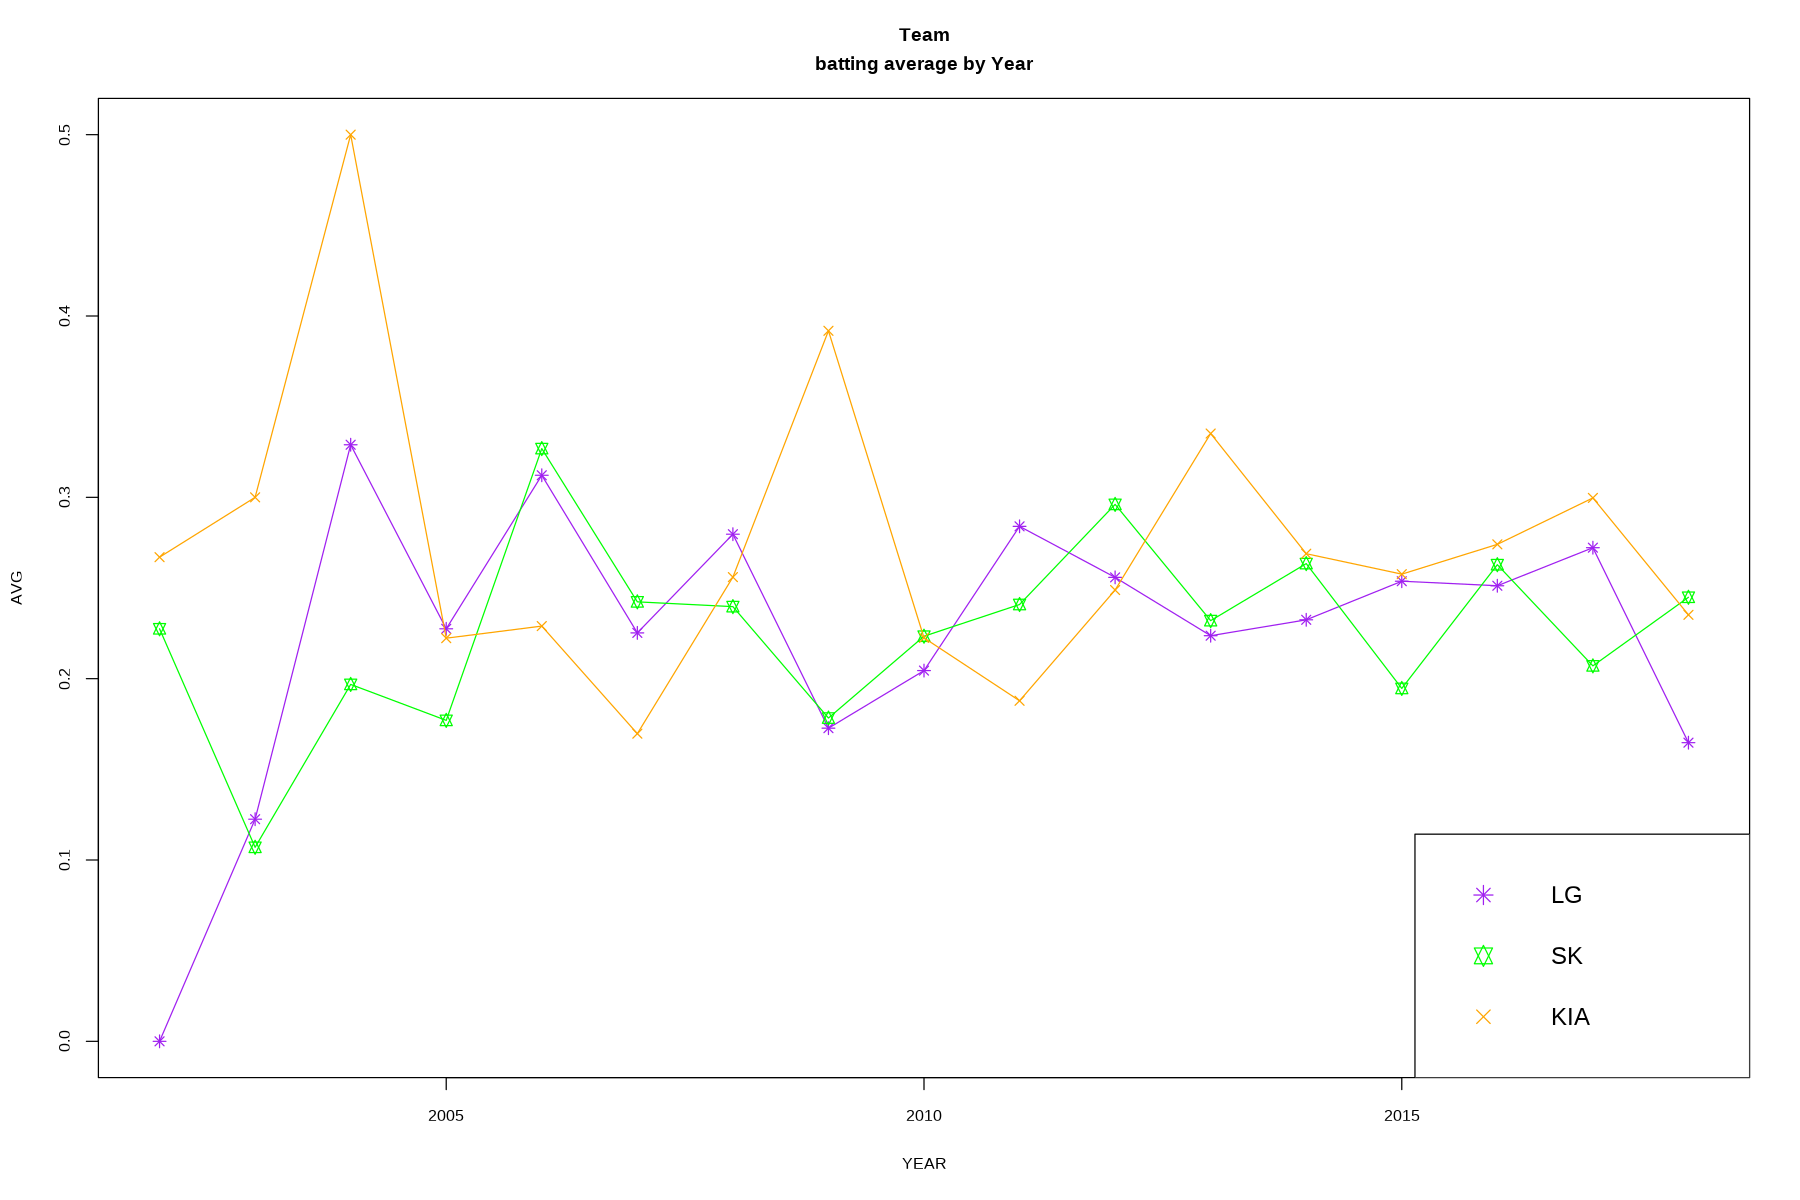

In [59]:
# 15번
# point와 line 함수
plot(x = team_year_avg$year, y = team_year_avg$avg_mean, type = "n", main = "Team
batting average by Year", xlab = "YEAR", ylab = "AVG")
# LG
points(x = lg$year, y = lg$avg_mean, col = "purple", pch = 8, cex = 1)
lines(x = lg$year, y = lg$avg_mean, col = "purple")
# SK
points(x = sk$year, y = sk$avg_mean, col = "green", pch = 11, cex = 1)
lines(x = sk$year, y = sk$avg_mean, col = "green")
# KIA
points(x = kia$year, y = kia$avg_mean, col = "orange", pch = 4, cex = 1)
lines(x = kia$year, y = kia$avg_mean, col = "orange")
legend("bottomright", legend = c("LG","SK","KIA"), pch = c(8,11,4), col = c("purple",
"green", "orange"), cex = 1.5)

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family '나눔고딕' not 

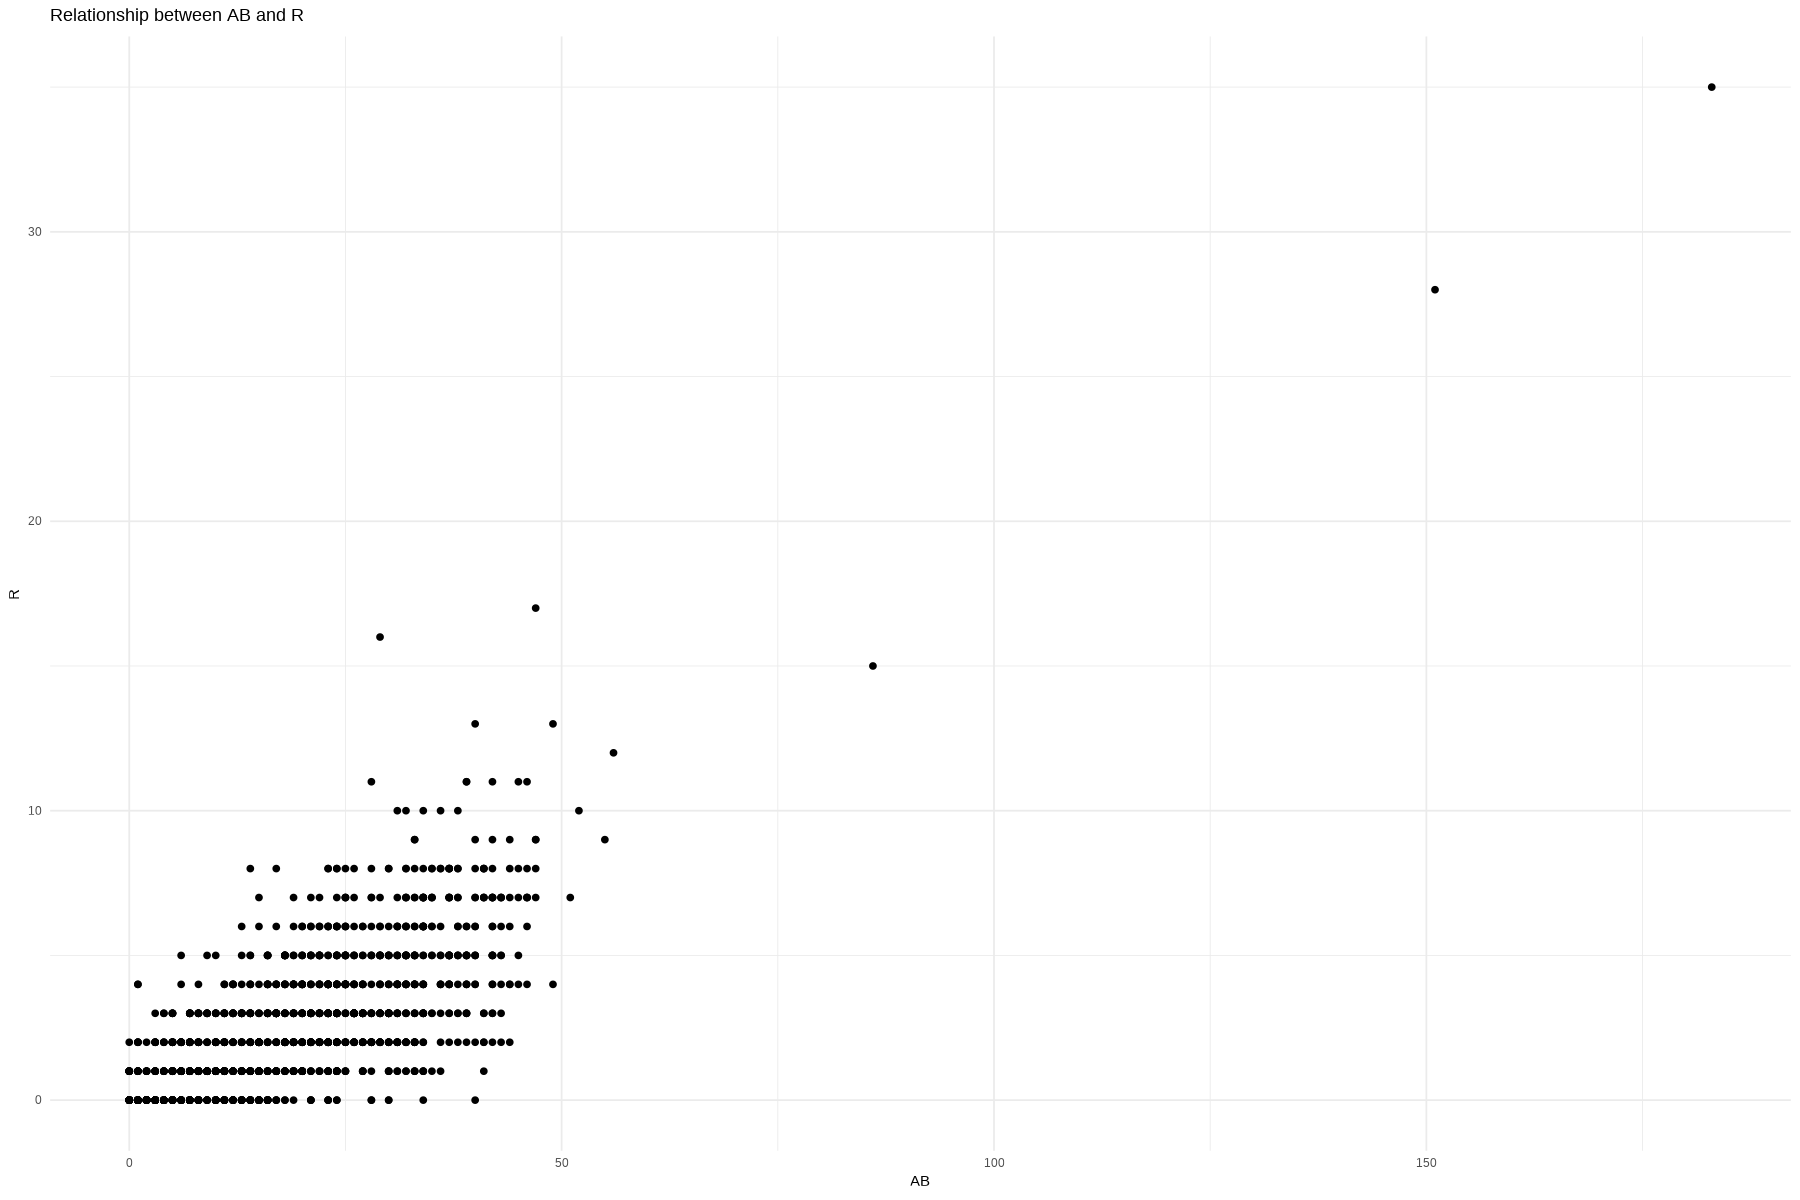

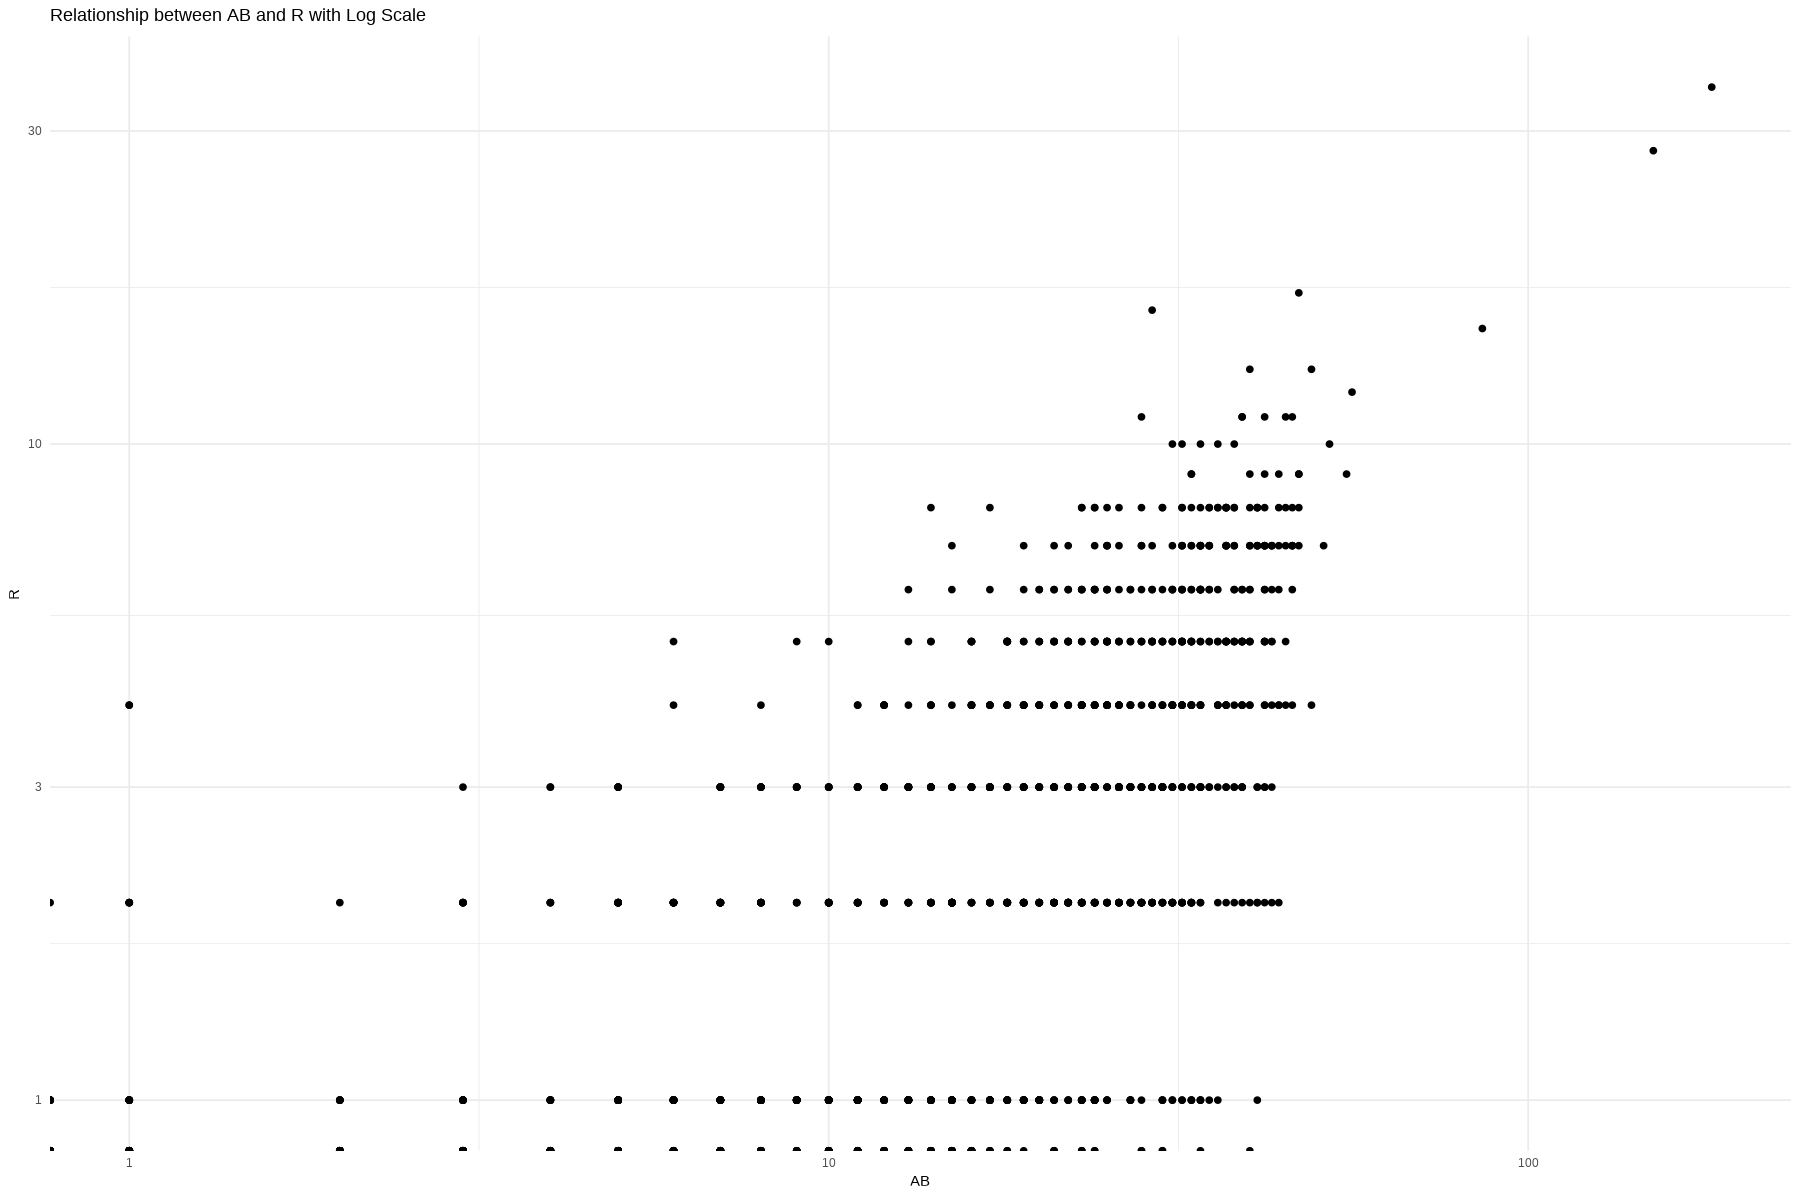

In [60]:
#16번
library(ggplot2)

# 일반 스케일로 그래프
ggplot(DF, aes(x=AB, y=R)) +
  geom_point() +
  ggtitle("Relationship between AB and R")

# 로그 스케일로 그래프
ggplot(DF, aes(x=AB, y=R)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Relationship between AB and R with Log Scale")


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_tex

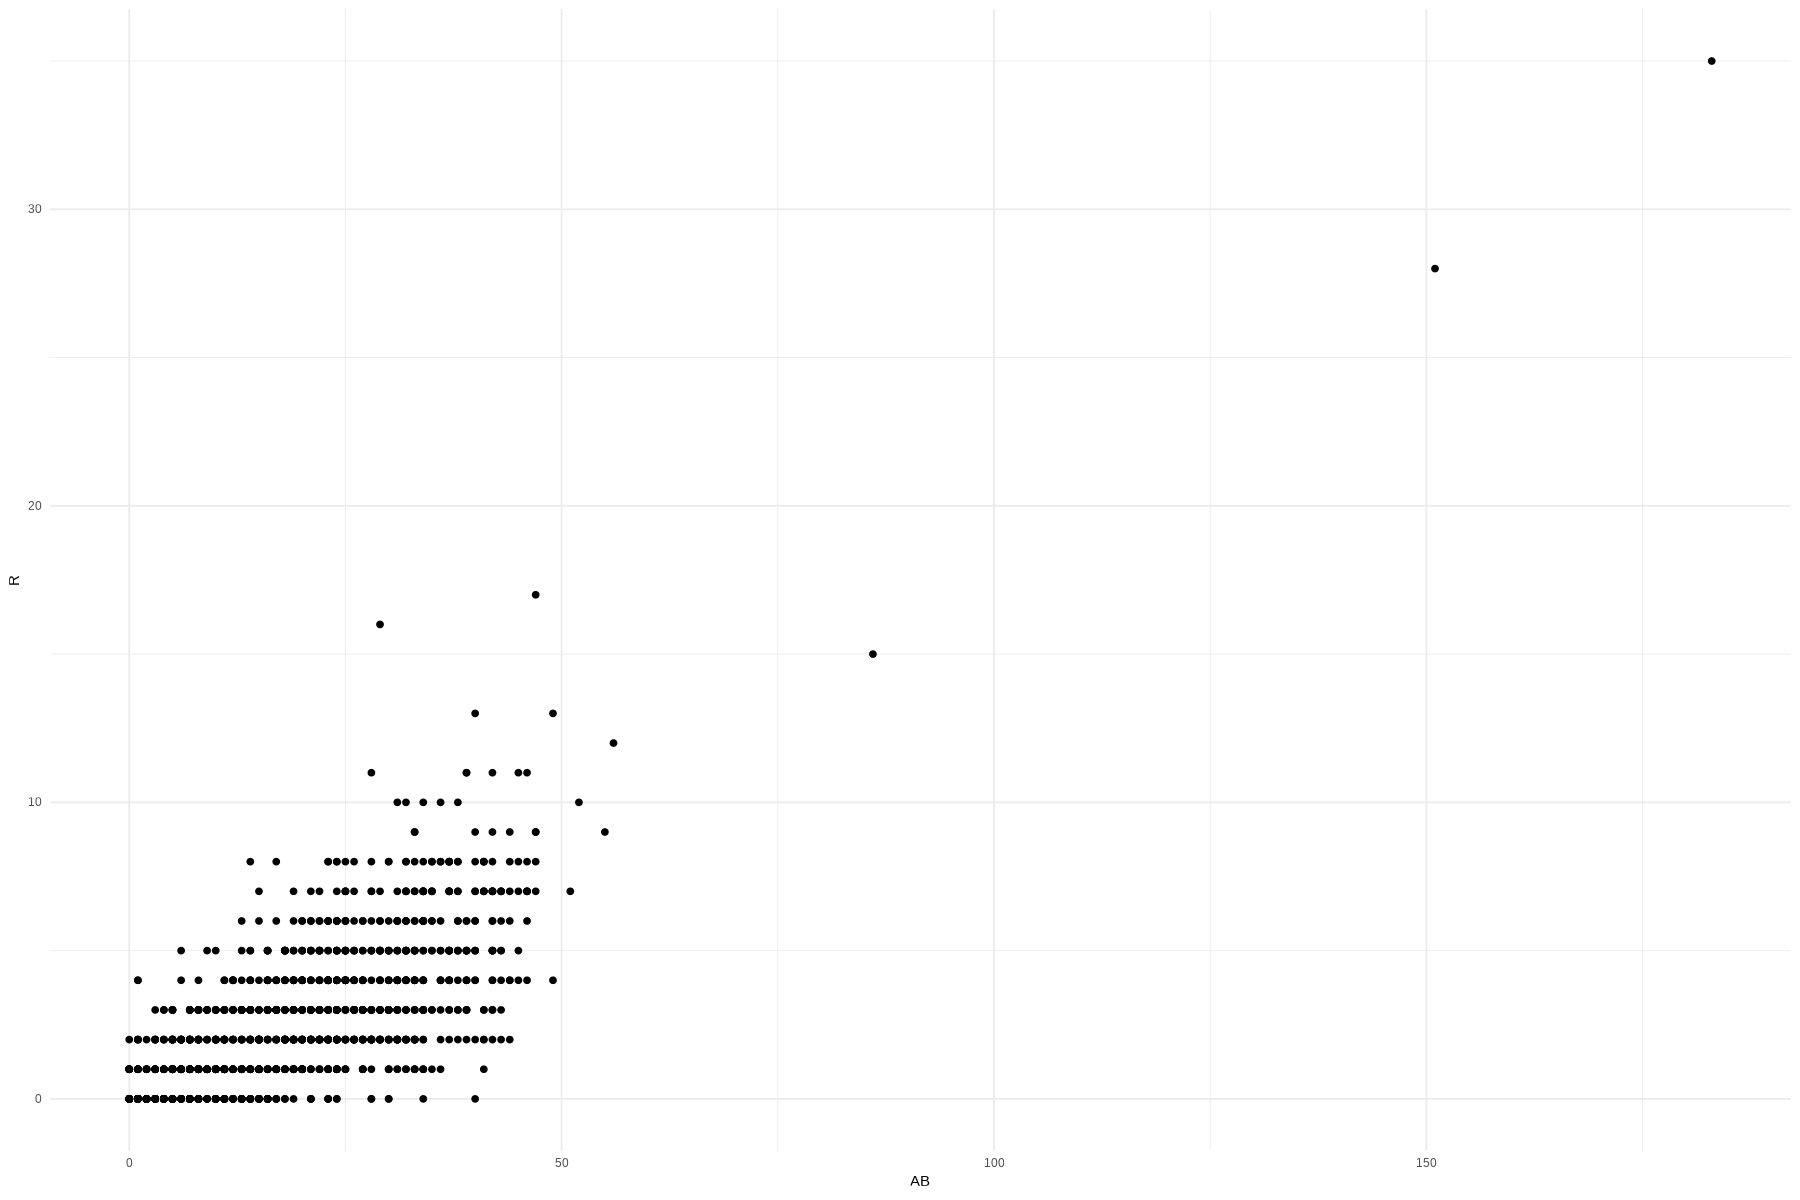

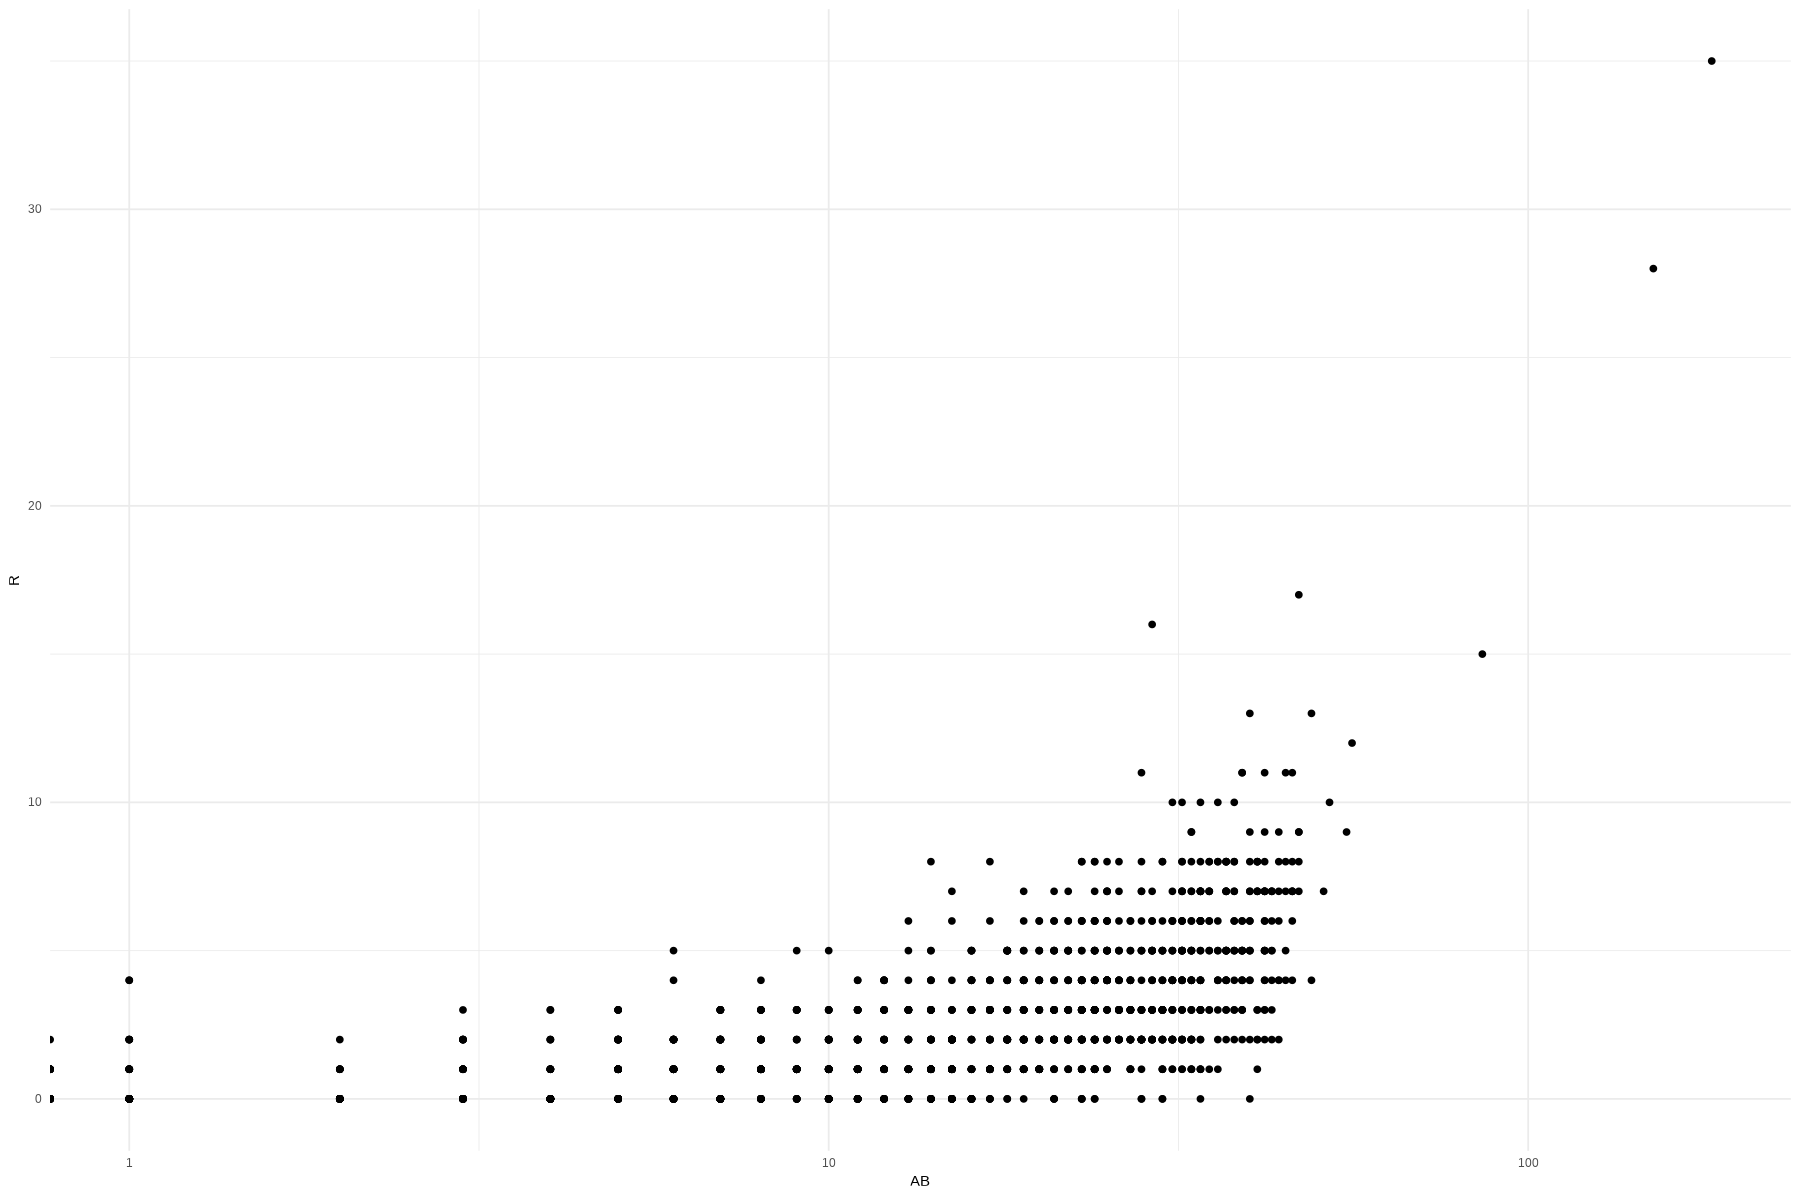

In [62]:
#16번 다른풀이
DF %>% ggplot(aes(x=AB,y=R)) + geom_point()

ggplot(data=DF, aes(x=AB,y=R)) + geom_point() + scale_x_log10()

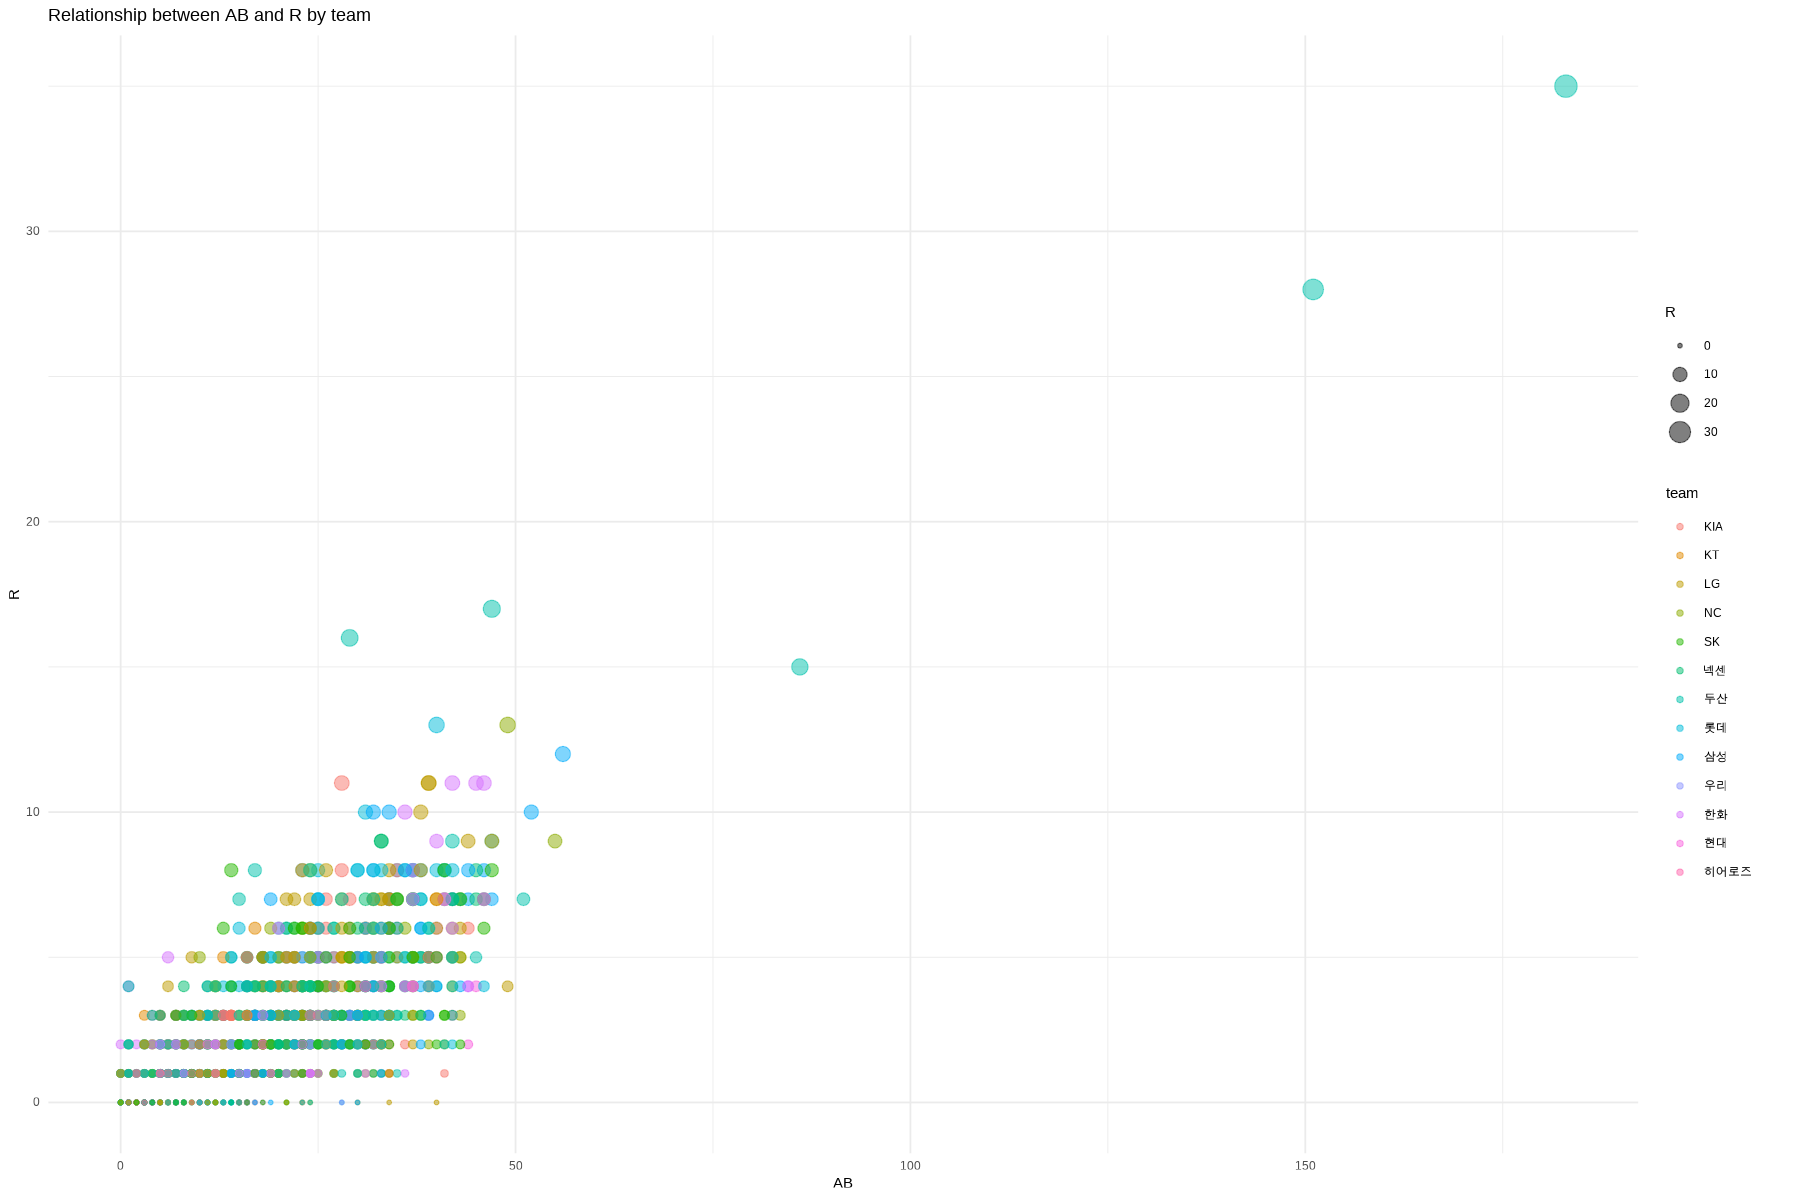

In [63]:
#17번
ggplot(DF, aes(x=AB, y=R, color=team, size=R)) +
  geom_point(alpha=0.5) +
  theme_minimal() +
  ggtitle("Relationship between AB and R by team")


In [21]:
install.packages("extrafont")
library(extrafont)

# 글꼴 데이터베이스 생성
font_import(prompt = FALSE)

# ggplot에 한글 폰트 적용하기 위한 설정
theme_set(theme_minimal(base_family = "나눔고딕"))  # "나눔고딕" 등 원하는 글꼴 이름을 넣으세요.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Registering fonts with R

Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/Humor-Sans

/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LiberationMono-Bold

/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LiberationMono-BoldItalic

/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LiberationMono-Italic

/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
 => /usr/local/lib/R/site-library/extrafontdb/metrics/LiberationMono-Regular

/usr/share/fonts/truetype/liberati

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
 : HumorSans already registered in fonts database. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
 : LiberationMono-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
 : LiberationMono-BoldItalic already registered in fonts database. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
 : LiberationMono-Italic already registered in fonts database. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
 : LiberationMono already registered in fonts database. Skipping.

/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
 : LiberationSans-Bold already registered in fonts database. Skipping.

/usr/share/f

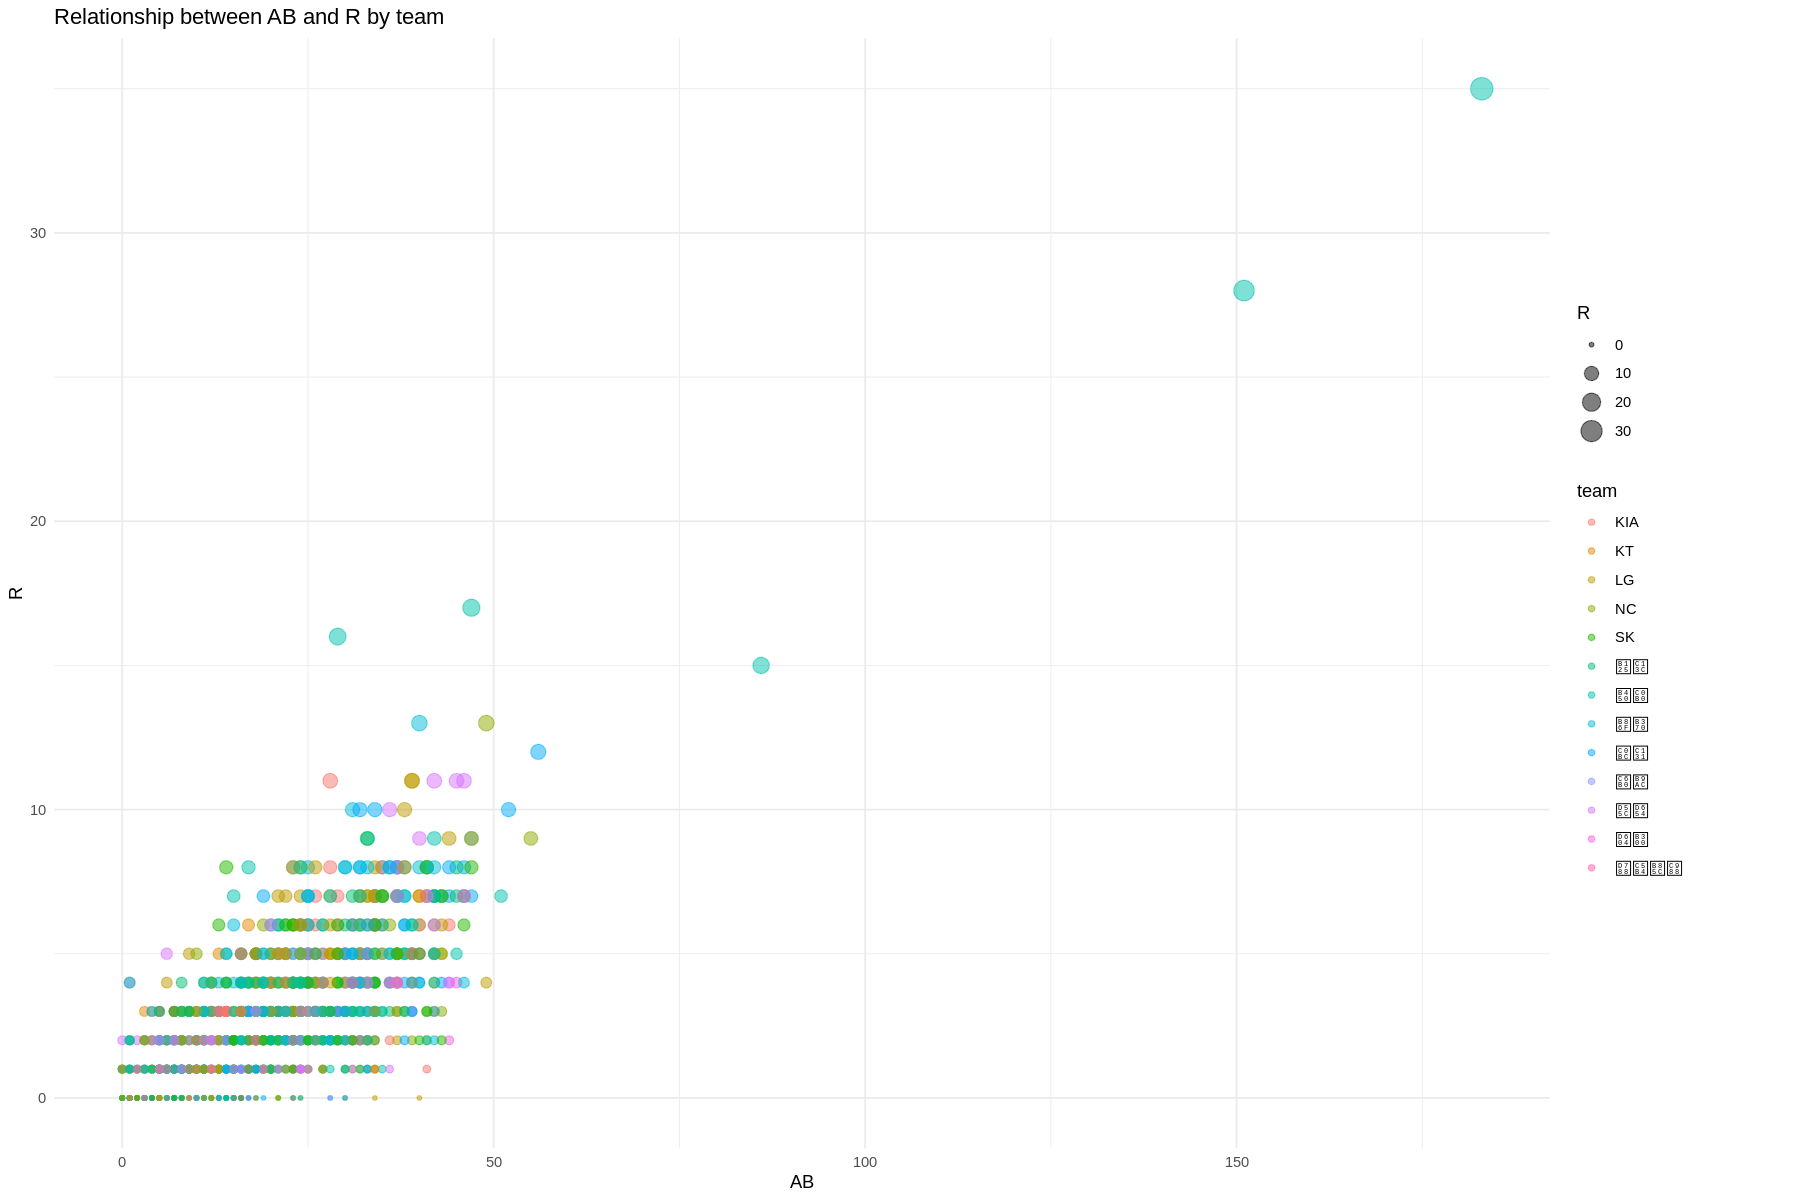

In [24]:
install.packages("extrafont")
library(extrafont)

# 글꼴 데이터베이스 생성
font_import(prompt = FALSE)

# ggplot에 한글 폰트 적용하기 위한 설정
theme_set(theme_minimal(base_family = "나눔고딕"))  # "나눔고딕" 등 원하는 글꼴 이름을 넣으세요.
ggplot(DF, aes(x=AB, y=R, color=team, size=R)) +
  geom_point(alpha=0.5) +
  theme_minimal() +
  ggtitle("Relationship between AB and R by team")


In [25]:
install.packages(c("sysfonts", "showtext"))
library(sysfonts)
library(showtext)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘showtextdb’


Loading required package: showtextdb


Attaching package: ‘showtextdb’


The following object is masked from ‘package:extrafont’:

    font_install




In [27]:
font_add_google("Nanum Gothic", "nanumgothic")
showtext_auto()

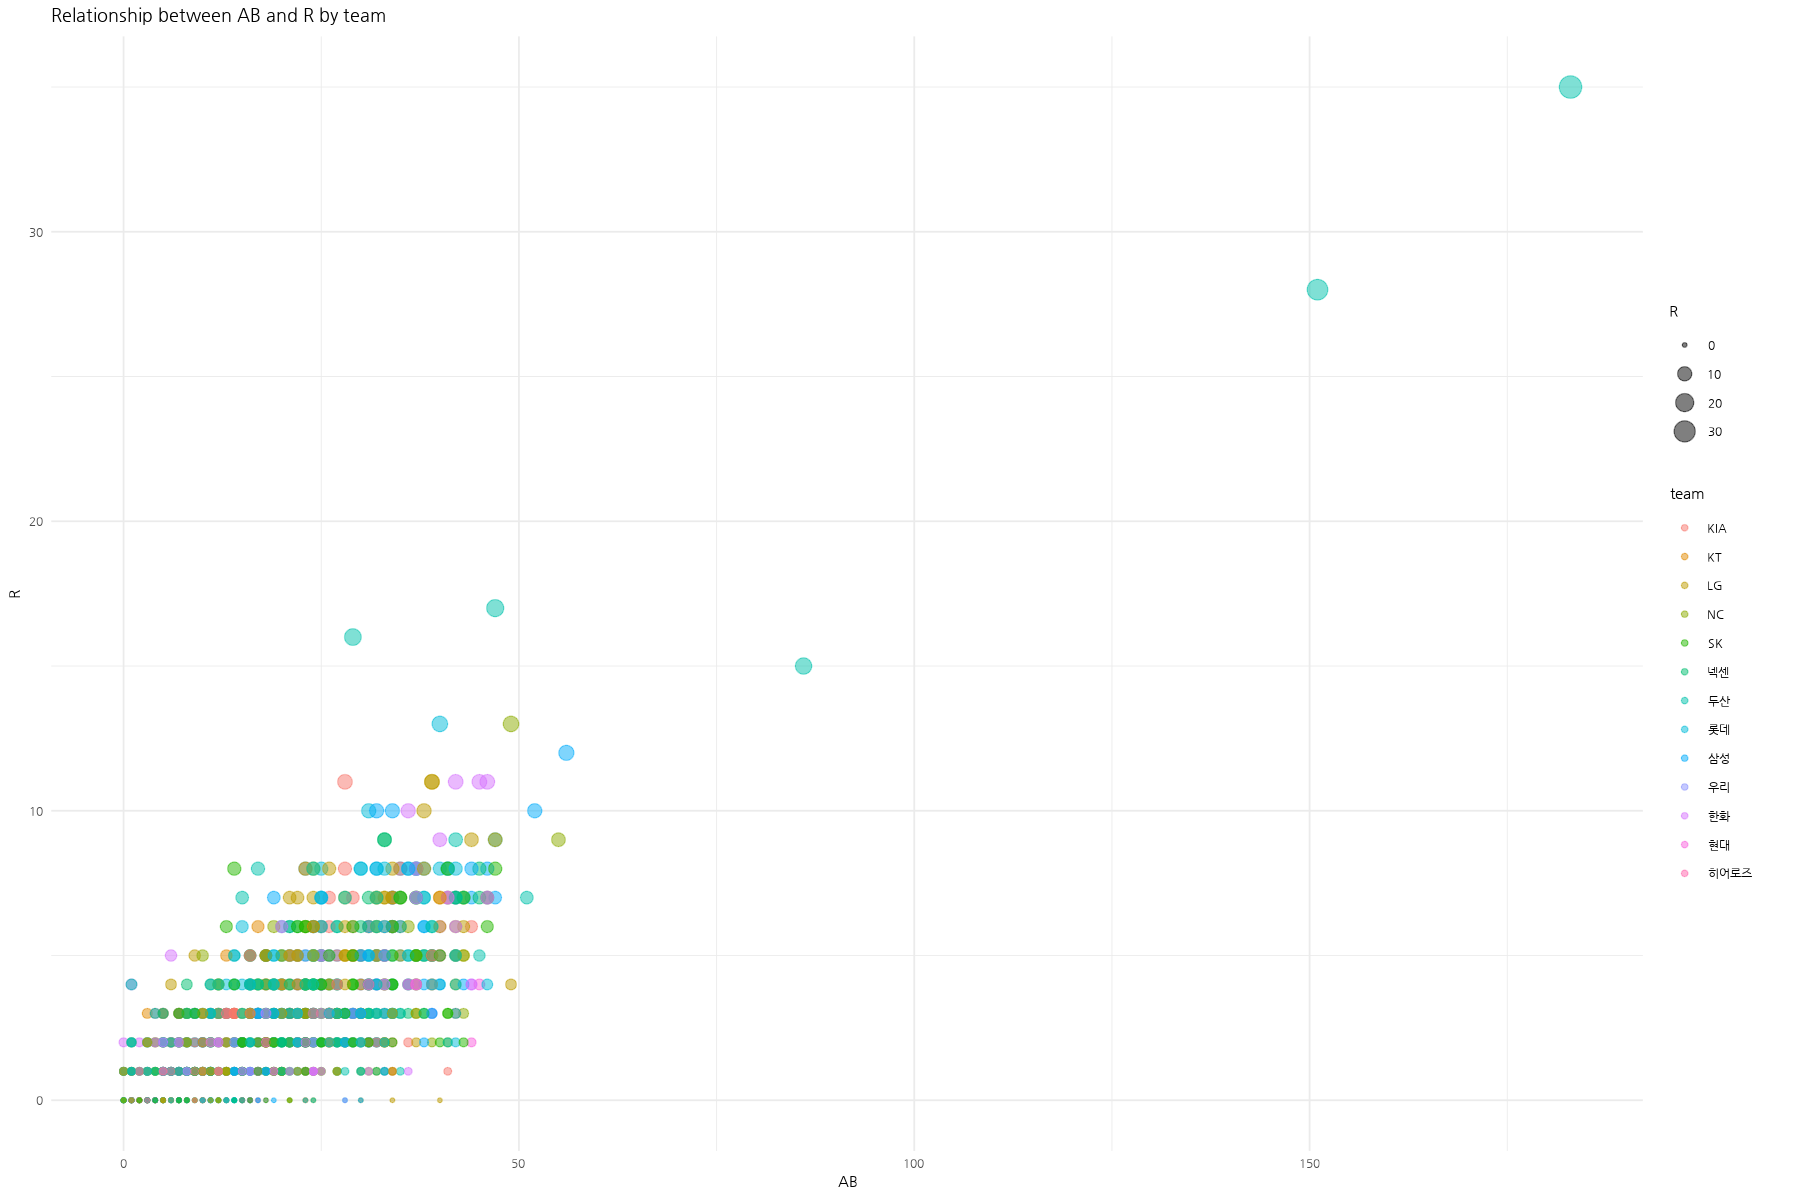

In [28]:
ggplot(DF, aes(x=AB, y=R, color=team, size=R)) +
  geom_point(alpha=0.5) +
  theme_minimal(base_family = "nanumgothic") +
  ggtitle("Relationship between AB and R by team")

In [65]:
#19번
library(dplyr)

team_R_H_sum <- DF %>%
  group_by(team) %>%
  summarise(R_SUM = sum(R, na.rm = TRUE),
            H_SUM = sum(H, na.rm = TRUE))

team_R_H_sum

team,R_SUM,H_SUM
<chr>,<int>,<int>
KIA,321,608
KT,143,273
LG,500,928
NC,195,389
SK,426,856
넥센,315,562
두산,601,1064
롯데,424,789
삼성,416,775


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family '나눔고딕' not found, will use 'sans' instead”
Warning message in grid.Call(C_tex

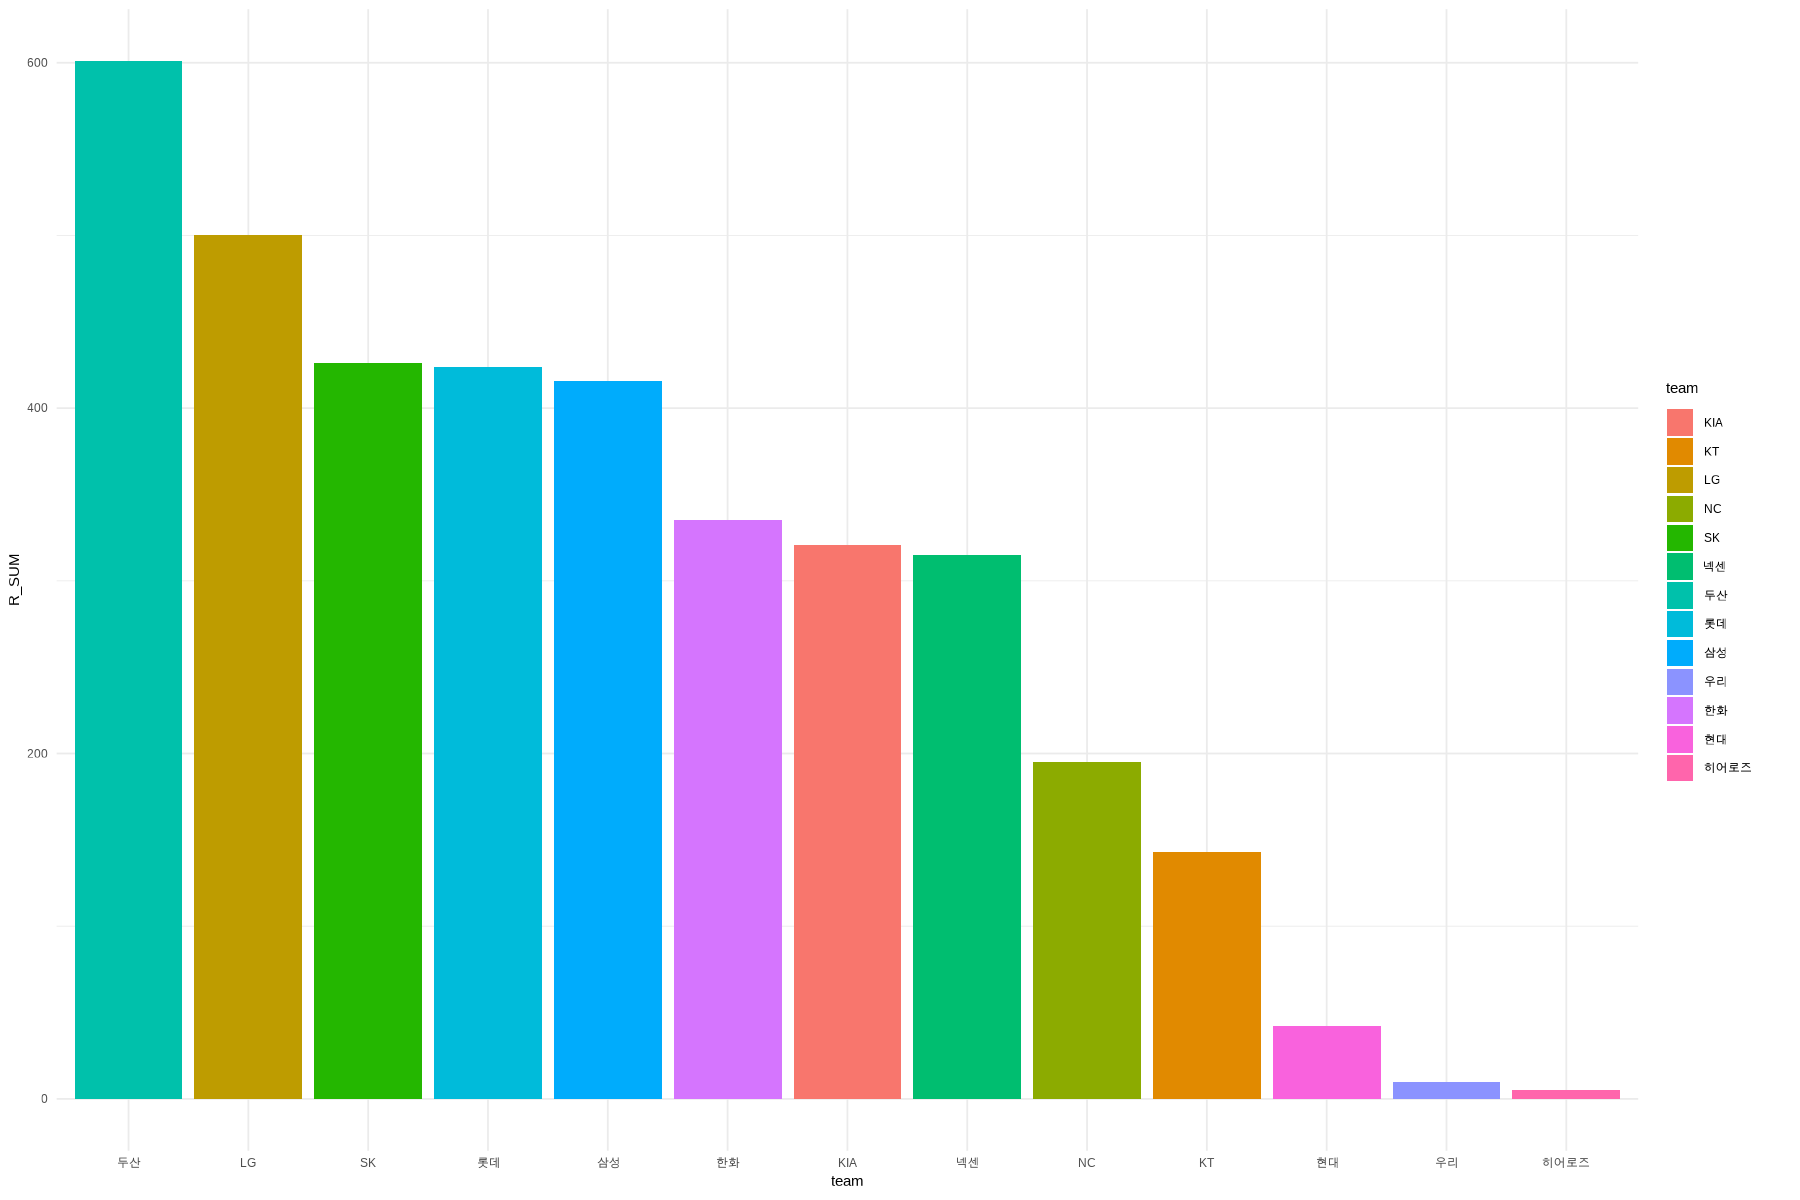

In [71]:
#20번
team_R_H_sum %>%
  ggplot(aes(x=team, y=R_SUM)) +
    geom_bar(stat="identity", aes(reorder(team, -R_SUM),fill=team))

In [ ]:
#21번